# Capstone Project: Diabete PRediction

**Overview**: In this project my goal is

### **Getting Started**

Our dataset comes from  *CDC*,The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC
This dataset contains 3 files:
diabetes _ 012 _ health _ indicators _ BRFSS2015.csv
diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.cs
diabetes _ binary _ health _ indicators _ BRFSS2015.csv


Explore some of the following research questions:

Can I find a model using this data from the BRFSS provide accurate predictions of whether an individual has diabetes based on the risk factors listed?

What risk factors are most helpfull to predict the  diabetes risk, corolation?


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import kagglehub
import os
os.makedirs("data", exist_ok=True)

In [74]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [75]:
df1 = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")
df3 = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")

In [76]:
df1.head()
df1.shape

(70692, 22)

In [77]:
df2.head()
df2.shape

(253680, 22)

In [78]:
df3.head()
df3.shape

(253680, 22)

*   diabetes_012 (3-class, imbalanced, big): Best for nuanced risk (prediabetes vs diabetes), but harder due to imbalance.
*   diabetes_binary_5050split (2-class, balanced, medium): Best for clean comparisons, easier training, but less realistic.

*   diabetes_binary (2-class, imbalanced, big): Best for real-world prevalence, but accuracy can mislead.



**“I chose the full binary dataset because it mirrors real-world prevalence, providing a larger and more representative sample for building realistic models.”**

**Features (Inputs – 21 variables)**


1.   HighBP – High blood pressure
2.   HighChol – High cholesterol
3.   CholCheck – Cholesterol check in 5 years
4.   BMI – Body Mass Index
5.   Smoker – Ever smoked 100 cigarettes
6.   Stroke – Ever had a stroke
7.   HeartDiseaseorAttack – Coronary heart disease or myocardial infarction
8.   PhysActivity – Physical activity in past 30 days

9.   PhysActivity – Physical activity in past 30 days

10.   Fruits – Consume fruits 1+ times per day
11.   Veggies – Consume vegetables 1+ times per day

12.   HvyAlcoholConsump – Heavy alcohol consumption
13.   AnyHealthcare – Have any kind of health care coverage
14.   NoDocbcCost – Couldn’t see a doctor because of cost
15.   GenHlth – Self-rated general health (1=excellent → 5=poor)
16.   MentHlth – Days of poor mental health (past 30)
17.   PhysHlth – Days of poor physical health (past 30)
18.   DiffWalk – Serious difficulty walking or climbing stairs
19.   Sex – Biological sex (0=Female, 1=Male)
20.   Age – Age category (13 levels)
21.   Education – Education level (1–6 scale)
22.   Income – Household income level (1–8 scale)


**Output (Target – differs by dataset)**
Diabetes_binary (2 classes, imbalanced, full population)

0 = no diabetes
1 = prediabetes or diabetes

->13-level age category  


*   1 Age 18 to 24
*   2 Age 25 to 29
*   3 Age 30 to 34
*   4 Age 35 to 39
*   5 Age 40 to 44
*   6 Age 45 to 49
*   7 Age 50 to 54
*   8 Age 55 to 59
*   9 Age 60 to 64
*   10 Age 65 to 69
*   11 Age 70 to 74
*   12 Age 75 to 79
*   13 Age 80 or older

->Education
*   1 Never attended school or only kindergarten
*   2 Grades 1 through 8 (Elementary)
*   3 Grades 9 through 11 (Some high school)
*   4 Grade 12 or GED (High school graduate)
*   5 College 1 year to 3 years (Some college or technical school)
*   6 College 4 years or more (College graduate)

 ->Incomes:
*   1 Less than $10,000
*   2 Less than $15,000 ($10,000 to less than $15,000)
*   3 Less than $20,000 ($15,000 to less than $20,000)
*   4 Less than $25,000 ($20,000 to less than $25,000)
*   5 Less than $35,000 ($25,000 to less than $35,000)
*   6 Less than $50,000 ($35,000 to less than $50,000)
*   7 Less than $75,000 ($50,000 to less than $75,000)
*   8 $75,000 or more

In [79]:
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [80]:

diabetes = df3.copy()

#Checking information of dataframe
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [81]:
#Describing datafram
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [82]:
# missing values of columns
diabetes.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [83]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [84]:
print("Duplicate Rows : ",len(diabetes[diabetes.duplicated()]))
diabetes.drop_duplicates(inplace=True)

Duplicate Rows :  23899


In [85]:
# Check data types of each column
print(diabetes.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [86]:
# Define mappings
age_map = {
    1: "18 to 24",
    2: "25 to 29",
    3: "30 to 34",
    4: "35 to 39",
    5: "40 to 44",
    6: "45 to 49",
    7: "50 to 54",
    8: "55 to 59",
    9: "60 to 64",
    10: "65 to 69",
    11: "70 to 74",
    12: "75 to 79",
    13: "80 or older"
}

education_map = {
    1: "Never attended / Kindergarten",
    2: "Elementary",
    3: "High school",
    4: "High school",
    5: "College 1–3",
    6: "College 4+"
}

income_map = {
    1: "Less than $10,000",
    2: "$10,000 to <$15,000",
    3: "$15,000 to <$20,000",
    4: "$20,000 to <$25,000",
    5: "$25,000 to <$35,000",
    6: "$35,000 to <$50,000",
    7: "$50,000 to <$75,000",
    8: "$75,000 or more"
}

# Apply mappings to create categorical (object) columns
diabetes["Age"] = diabetes["Age"].map(age_map)
diabetes["Education"] = diabetes["Education"].map(education_map)
diabetes["Income"] = diabetes["Income"].map(income_map)
diabetes["Sex"] = diabetes["Sex"].replace({0: "Female", 1: "Male"})
diabetes["GenHlth"] = diabetes["GenHlth"].replace({
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor"
})

In [87]:
diabetes.head(10)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Poor,18.0,15.0,1.0,Female,60 to 64,High school,"$15,000 to <$20,000"
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,Good,0.0,0.0,0.0,Female,50 to 54,College 4+,"Less than $10,000"
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,Poor,30.0,30.0,1.0,Female,60 to 64,High school,"$75,000 or more"
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very good,0.0,0.0,0.0,Female,70 to 74,High school,"$35,000 to <$50,000"
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very good,3.0,0.0,0.0,Female,70 to 74,College 1–3,"$20,000 to <$25,000"
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very good,0.0,2.0,0.0,Male,65 to 69,College 4+,"$75,000 or more"
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Good,0.0,14.0,0.0,Female,60 to 64,College 4+,"$50,000 to <$75,000"
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Good,0.0,0.0,1.0,Female,70 to 74,High school,"$20,000 to <$25,000"
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Poor,30.0,30.0,1.0,Female,60 to 64,College 1–3,"Less than $10,000"
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Very good,0.0,0.0,0.0,Male,55 to 59,High school,"$15,000 to <$20,000"


In [88]:
# Check data types of each column
print(diabetes.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                  object
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                      object
Education                object
Income                   object
dtype: object


In [89]:
# explore data uniqe values
print(diabetes.select_dtypes('object').agg('nunique'))

GenHlth       5
Sex           2
Age          13
Education     5
Income        8
dtype: int64


In [90]:
diabetes["Diabetic"] = diabetes["Diabetes_012"].replace({2: 1})
diabetes = diabetes.drop(columns=["Diabetes_012"])

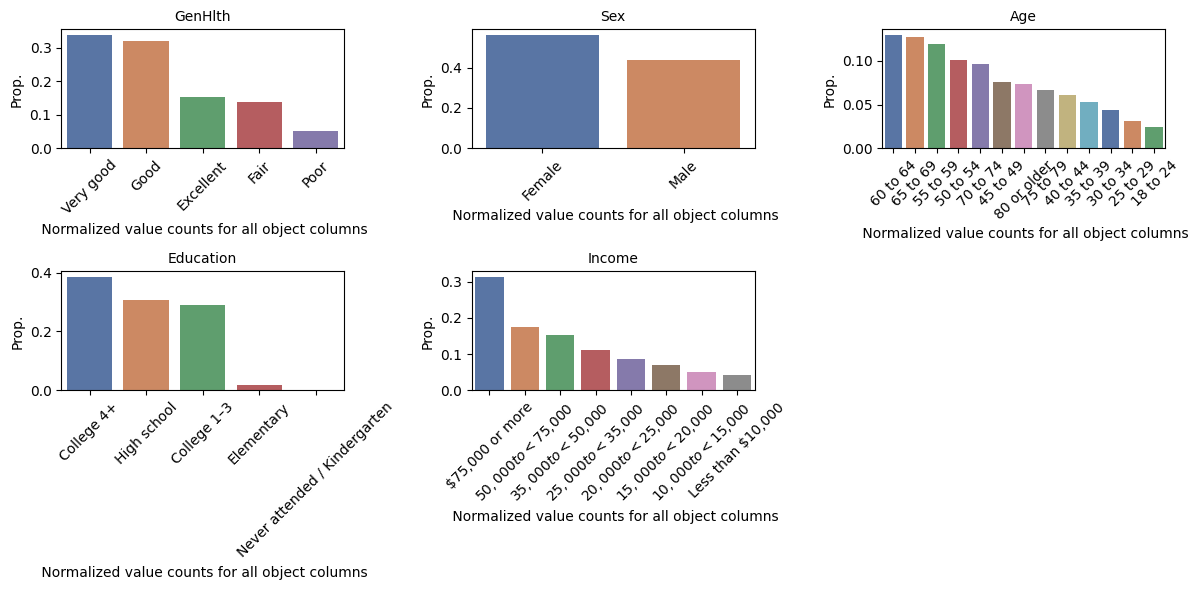

In [91]:
#EDA – Univariate Analysis for Categorial features
import math
def plot_normalized_bars_all(df, top_n=None, palette="deep"):
    """
    Plots normalized value counts for all object columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    obj_cols = df.select_dtypes(include=['object']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(obj_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, obj_cols):
        proportions = df[col].value_counts(normalize=True, dropna=False).round(4).sort_values(ascending=False)
        if top_n:
          proportions = proportions.head(top_n)

        sns.barplot(
            x=proportions.index,
            y=proportions.values,
            order=proportions.index,
            palette=palette,
            ax=ax,
            hue=proportions.index
        )

        ax.set_title(col, fontsize=10)
        ax.set_xlabel(" Normalized value counts for all object columns")
        ax.set_ylabel("Prop.")
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(obj_cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
plot_normalized_bars_all(diabetes)

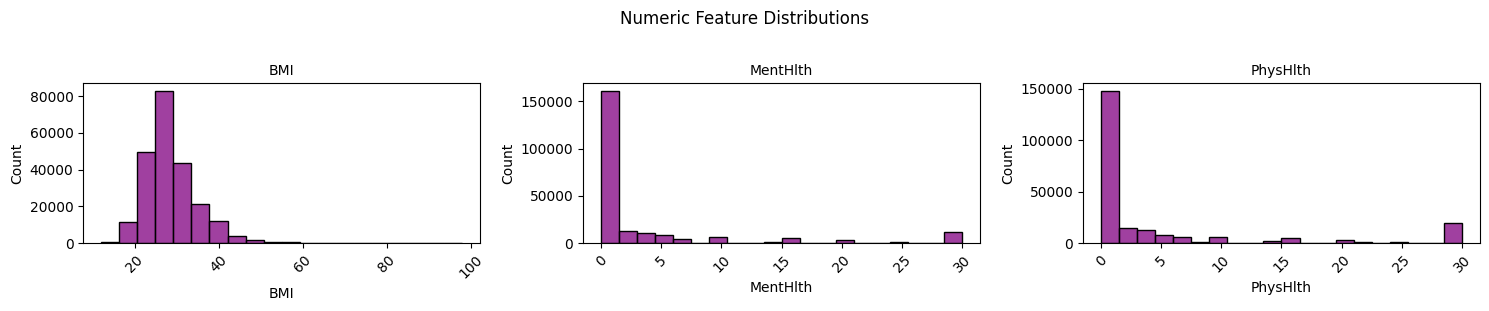

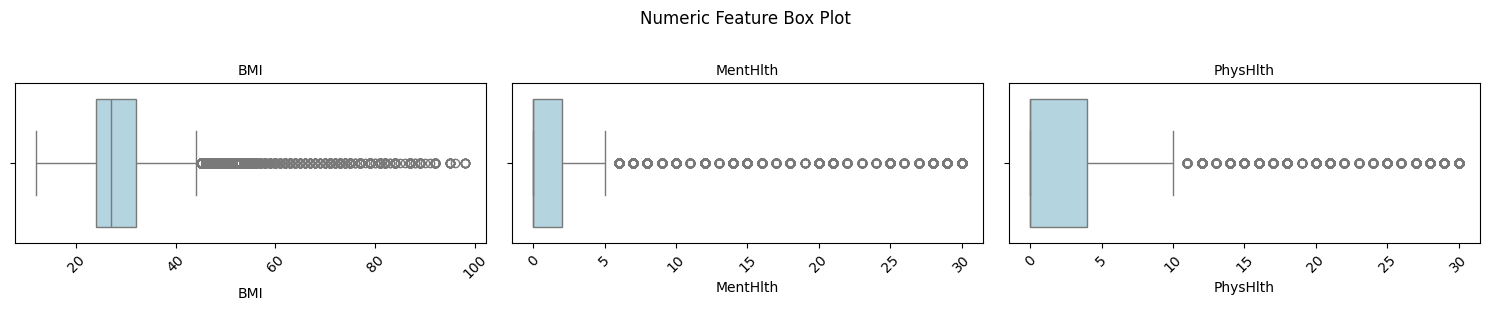

In [92]:
#EDA – Univariate Analysis for numerical features
# IF binary exclude
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Diabetic"
]
def plot_normalized_Histo_all(df, top_n=None ,bins=20, palette="deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    # Exclude binary (0/1) columns
    num_cols = [
        col for col in num_cols
        if not set(df[col].dropna().unique()).issubset({0, 1})
    ]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        unique_vals = df[col].dropna().unique()
        sns.histplot(df[col], kde=False, ax=ax, bins=bins, color='purple')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)
    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout()
    plt.show()

def plot_normalized_box_all(df, top_n=None,palette = "deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    # Exclude binary (0/1) columns
    num_cols = [
        col for col in num_cols
        if not set(df[col].dropna().unique()).issubset({0, 1})
    ]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        # Box plot
        sns.boxplot(x=df[col],ax=ax,color='lightblue')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Box Plot", y=1.02)
    plt.tight_layout()
    plt.show()

plot_normalized_Histo_all(diabetes)
plot_normalized_box_all(diabetes)

In [93]:
diabetes["Diabetic"].value_counts()


,count
Diabetic,
0.0,190055
1.0,39726


In [94]:
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Diabetic"
]

def plot_binary_pies(df, binary_cols):
    """
    Create pie charts for multiple binary columns in a DataFrame.

    Args:
        df (DataFrame): Your dataset.
        binary_cols (list): List of binary column names (0/1).
    """
    n_cols = 3  # number of plots per row
    n_rows = -(-len(binary_cols) // n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()

    for ax, col in zip(axes, binary_cols):
        counts = df[col].value_counts().sort_index()
        labels = [f"{col}=0", f"{col}=1"]

        ax.pie(counts, labels=labels, autopct="%.1f%%",
               colors=["#66b3ff", "#ff9999"], startangle=90)
        ax.set_title(col)

    # Hide unused subplots
    for ax in axes[len(binary_cols):]:
        ax.axis("off")

    fig.suptitle("Binary Feature Distributions", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()



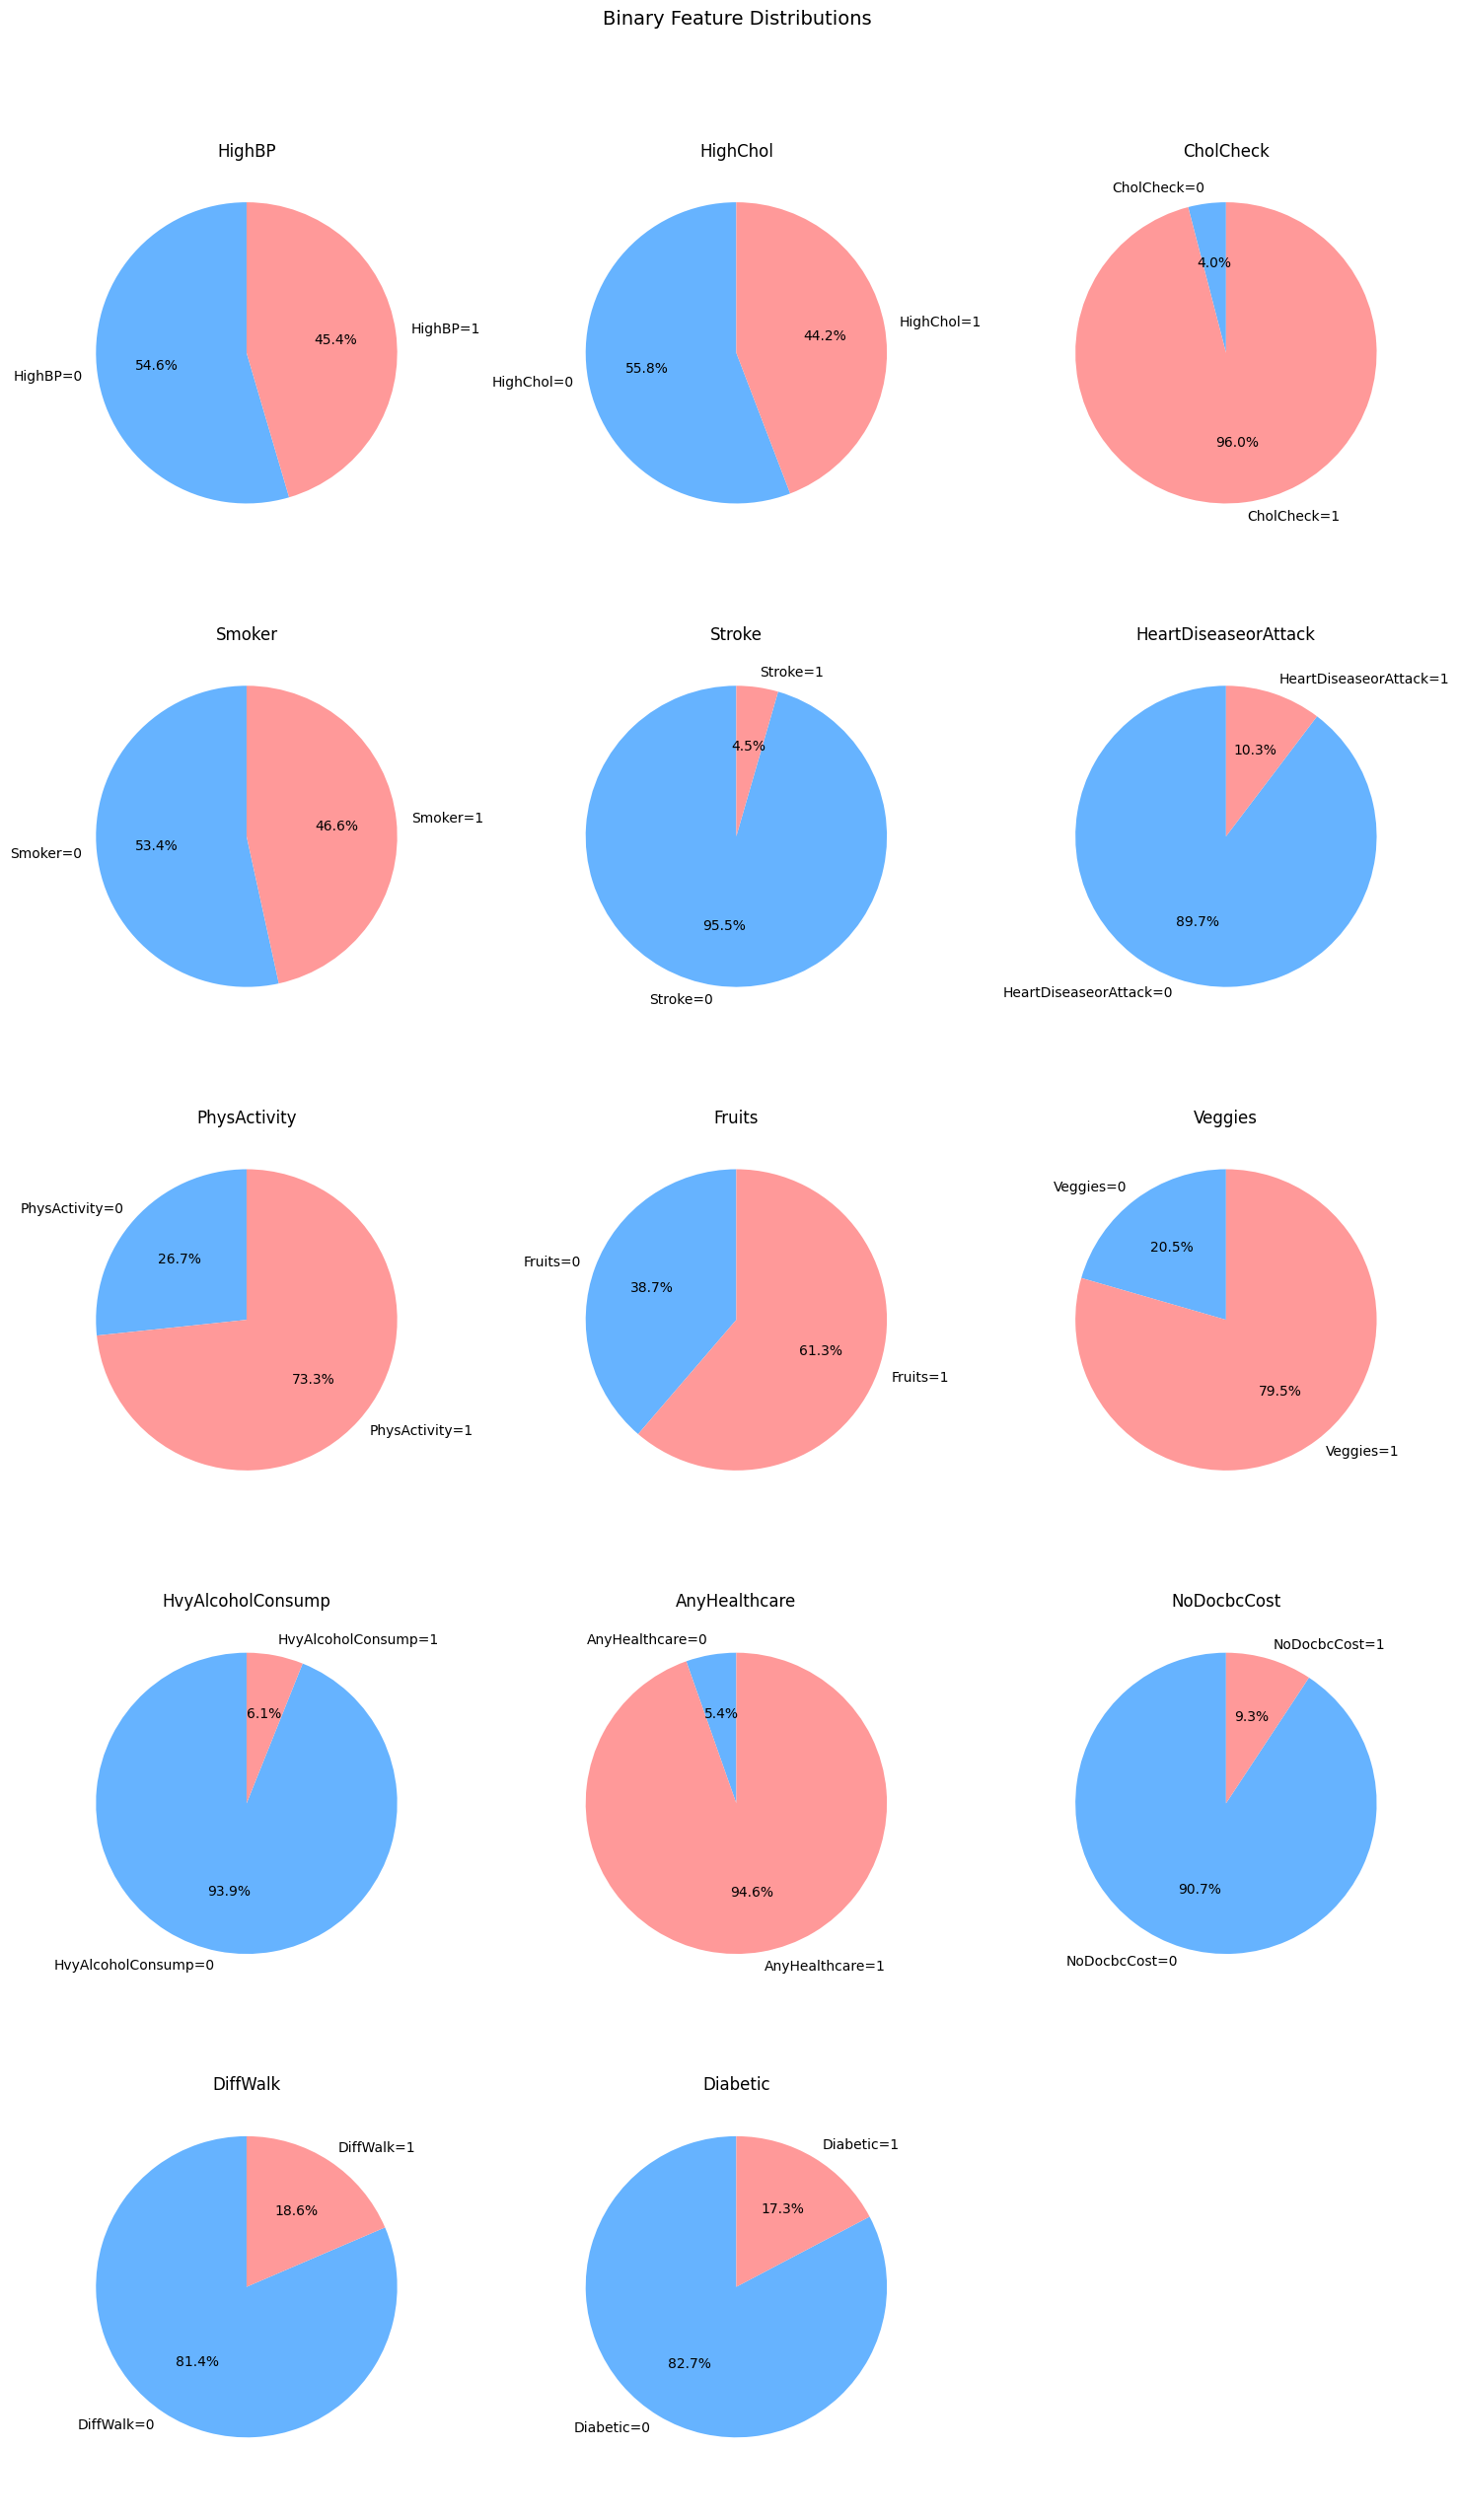

In [95]:
plot_binary_pies(diabetes, binary_cols)

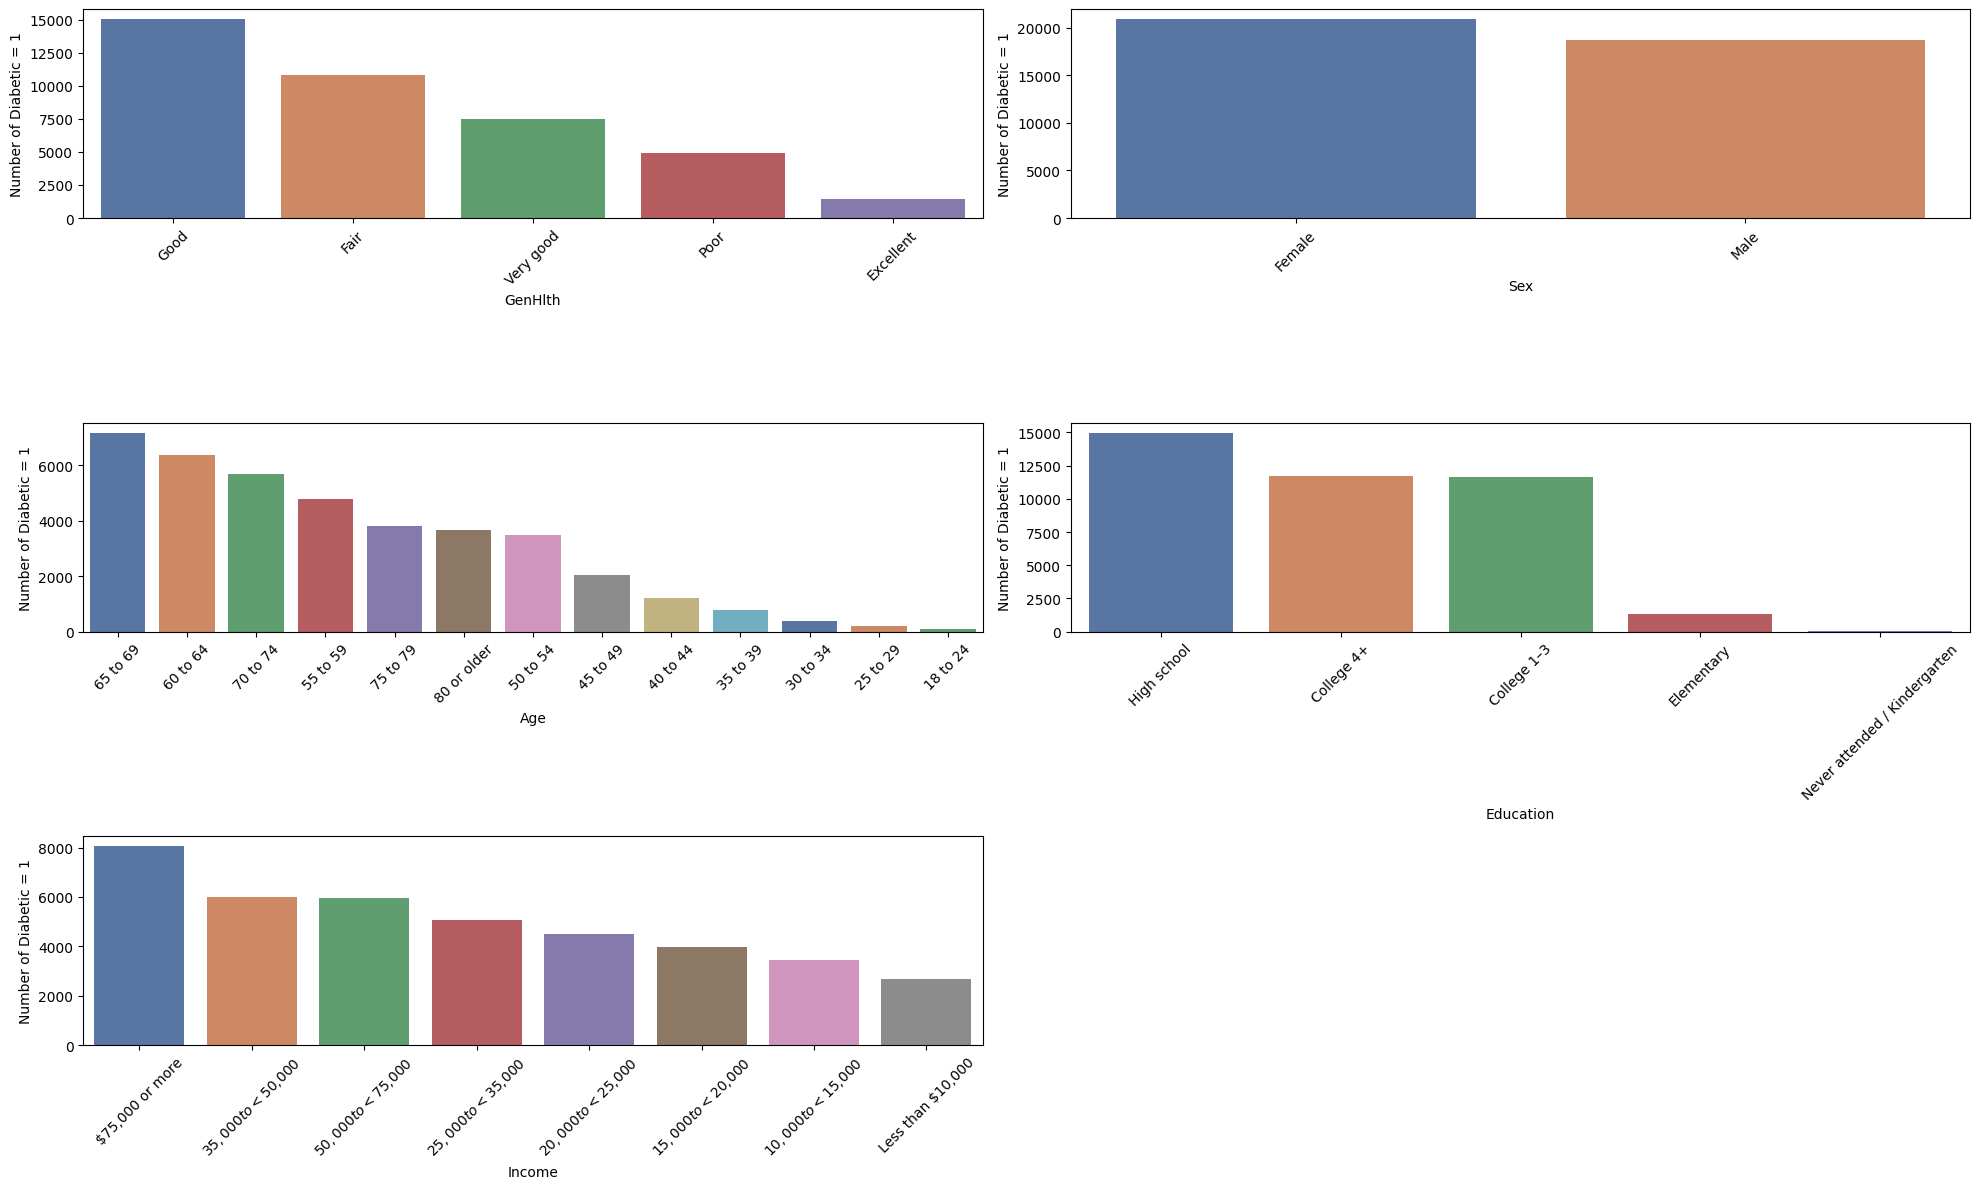

In [96]:
#EDA - Bivariate categories
def plot_target_rate_by_category(data, target, min_count=1):
    # keep only rows where target == 1
    data = data[data[target] == 1]

    cat_cols = [c for c in data.select_dtypes(include=['object']).columns if c != target]

    n_cols = 2  # number of subplot columns
    n_rows = math.ceil(len(cat_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 10, n_rows * 4))
    axes = axes.flatten()

    for ax, col in zip(axes, cat_cols):
        grouped = (
            data.groupby(col)[target]
            .agg(count="size")
        )

        grouped = grouped.sort_values("count", ascending=False)
        grouped = grouped.query("count >= @min_count")

        # plot proportion of diabetic==1 (here it's always 100% of filtered rows, so use counts)
        sns.barplot(
            x=grouped.index,
            y="count",
            data=grouped,
            ax=ax,
            palette="deep",
            hue=grouped.index,
            legend=False,
        )
        ax.set_ylabel("Number of Diabetic = 1")
        ax.tick_params(axis="x", rotation=45)

    # Hide unused subplots
    for ax in axes[len(cat_cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


plot_target_rate_by_category(diabetes, "Diabetic")

**Diabetic Column Analysis**




In [97]:
diabetes["Diabetic"].replace({0:"Non-Diabetic",1:"Diabetic"}).value_counts()

,count
Diabetic,
Non-Diabetic,190055
Diabetic,39726


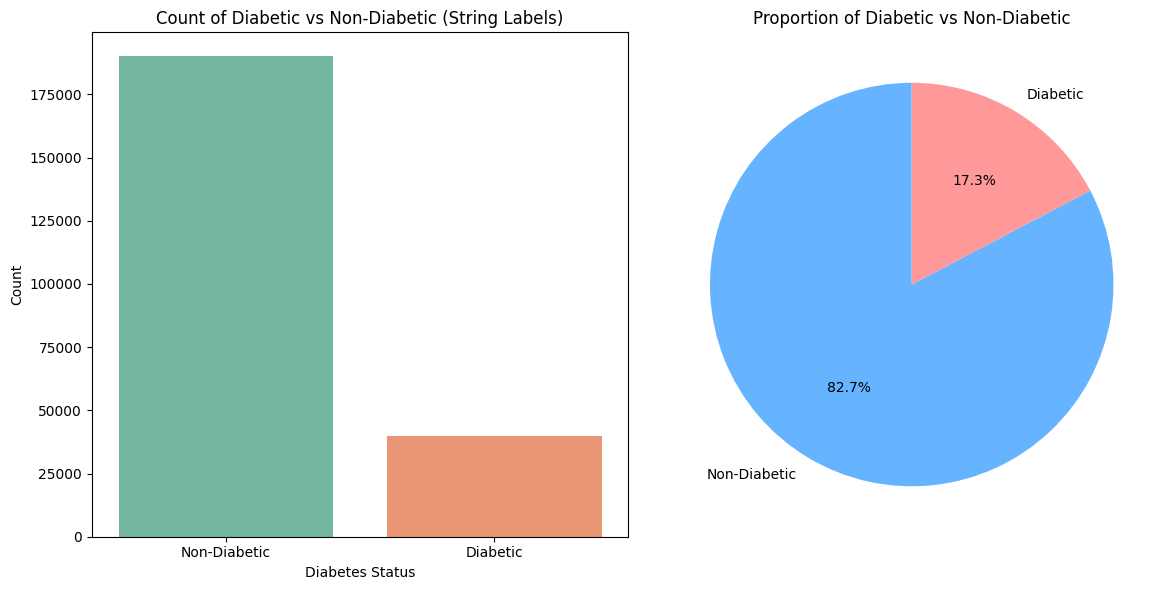

In [98]:
#checking the value count of Diabetes_binary_str by using countplot
import warnings
warnings.filterwarnings('ignore')

# Create 1 row, 2 columns subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
dftemp = diabetes
dftemp["Diabetes_binary_str"]= dftemp["Diabetic"].replace({0:"Non-Diabetic",1:"Diabetic"})
# --- Countplot for Diabetes_binary_str ---
sns.countplot(x="Diabetes_binary_str", data=dftemp, ax=axes[0], palette="Set2")
axes[0].set_title("Count of Diabetic vs Non-Diabetic (String Labels)")
axes[0].set_xlabel("Diabetes Status")
axes[0].set_ylabel("Count")

# --- Pie chart for Diabetes_binary ---
labels = ["Non-Diabetic", "Diabetic"]
axes[1].pie(diabetes["Diabetic"].value_counts(),
            labels=labels,
            autopct='%.1f%%',
            colors=["#66b3ff", "#ff9999"],
            startangle=90)
axes[1].set_title("Proportion of Diabetic vs Non-Diabetic")

plt.tight_layout()
plt.show()

# EDA Bivariate and Multi

In [99]:
# Correlation features and Diabetic
corr_matrix = diabetes.corr(numeric_only=True)
print(corr_matrix)

                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.284186   0.111220  0.194126  0.074237   
HighChol              0.284186  1.000000   0.094753  0.089615  0.074627   
CholCheck             0.111220  0.094753   1.000000  0.042420 -0.003776   
BMI                   0.194126  0.089615   0.042420  1.000000 -0.009196   
Smoker                0.074237  0.074627  -0.003776 -0.009196  1.000000   
Stroke                0.124426  0.089258   0.027894  0.011062  0.054438   
HeartDiseaseorAttack  0.201271  0.176279   0.049995  0.039926  0.105154   
PhysActivity         -0.104131 -0.063266  -0.004409 -0.127864 -0.066981   
Fruits               -0.019329 -0.026125   0.017973 -0.067528 -0.061947   
Veggies              -0.042853 -0.027254  -0.000537 -0.044185 -0.013892   
HvyAlcoholConsump    -0.014218 -0.019104  -0.021043 -0.058334  0.096052   
AnyHealthcare         0.052084  0.052412   0.115539 -0.008560 -0.013983   
NoDocbcCost           0.0

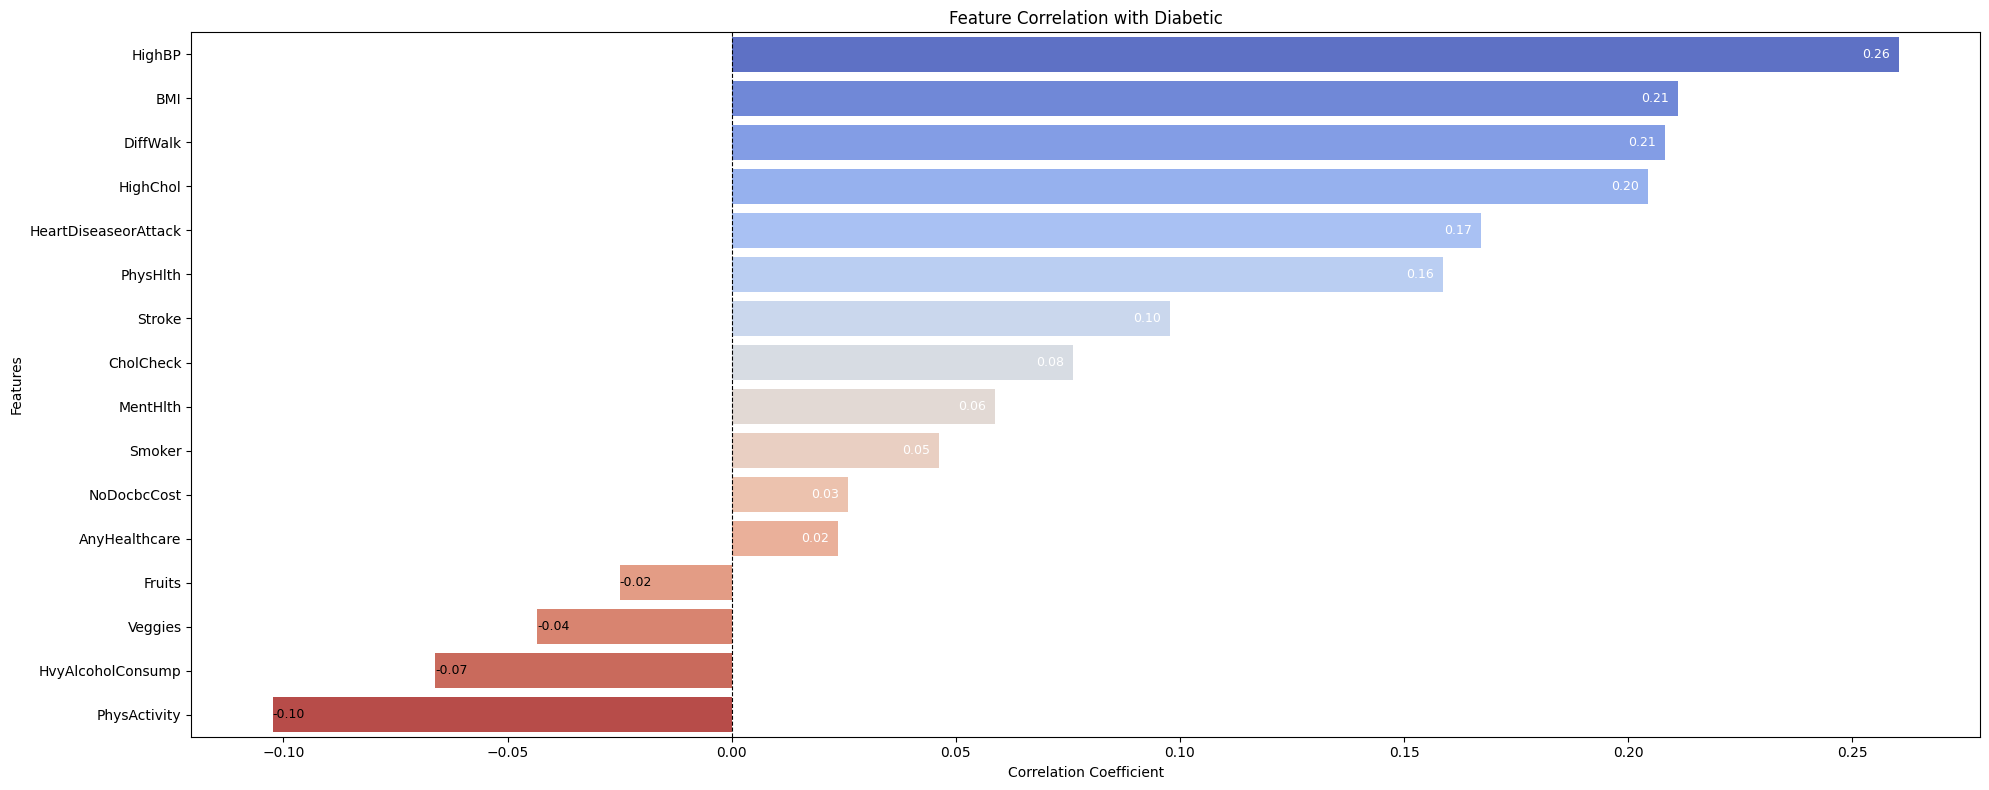

In [100]:
# Compute correlations (numeric only)
corr_matrix = diabetes.corr(numeric_only=True)

# Get correlations with target column
target_corr = corr_matrix["Diabetic"].drop("Diabetic").sort_values(ascending=False)



plt.figure(figsize=(20,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")

plt.title("Feature Correlation with Diabetic")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)

# Add labels
for i, v in enumerate(target_corr.values):
    if v > 0:
        plt.text(v-0.002 , i, f"{v:.2f}", va="center", ha="right", color="white", fontsize=9)
    else:
        plt.text(v + 0, i, f"{v:.2f}", va="center", ha="left", color="black", fontsize=9)


plt.tight_layout()
plt.show()

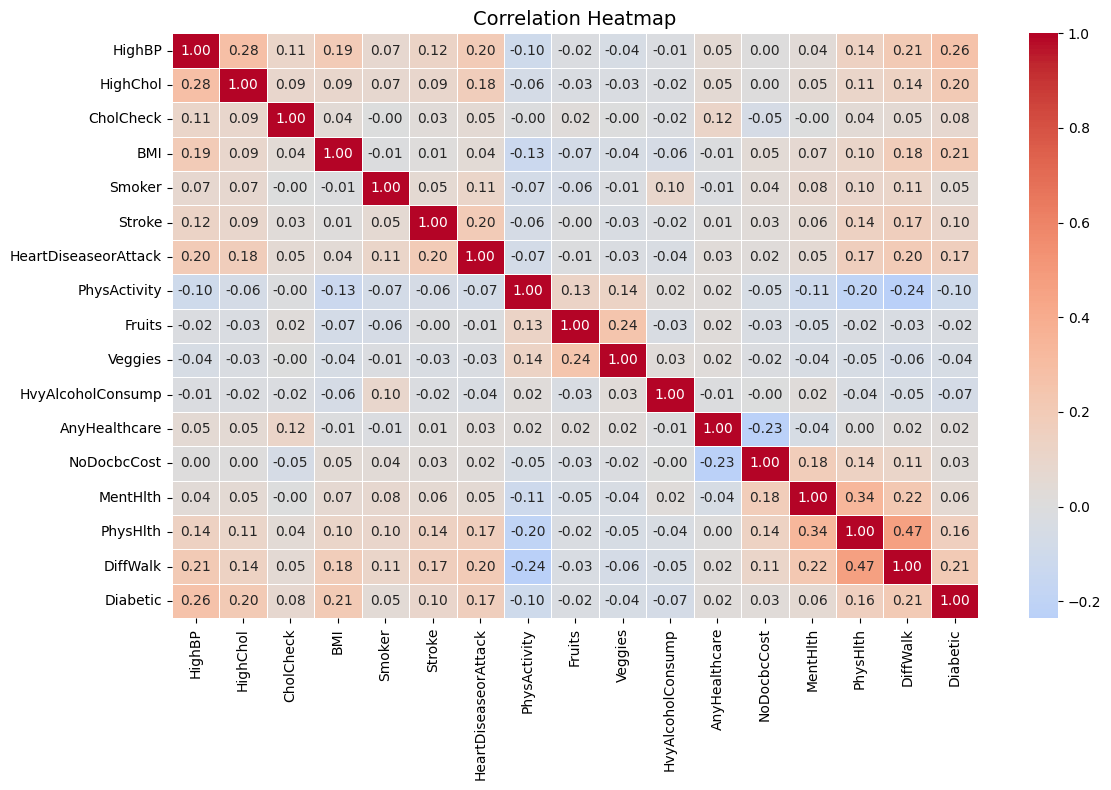

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # color map
    center=0,          # 0 at the center
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

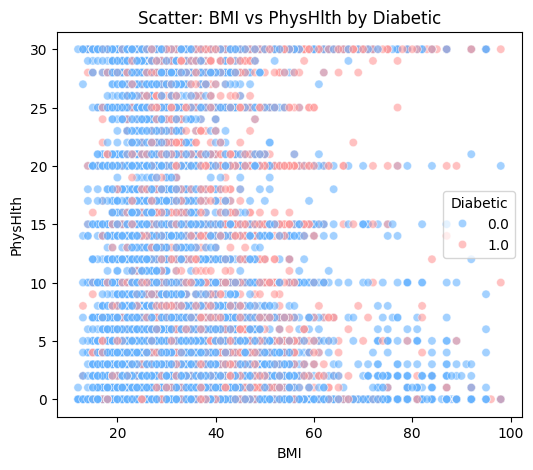

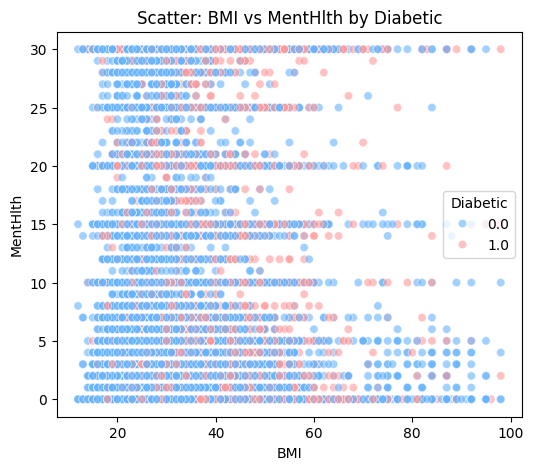

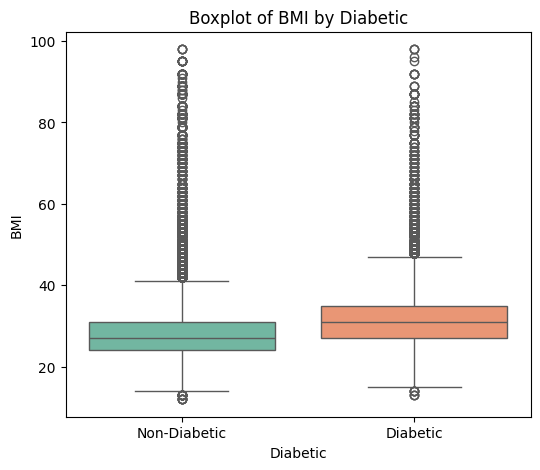

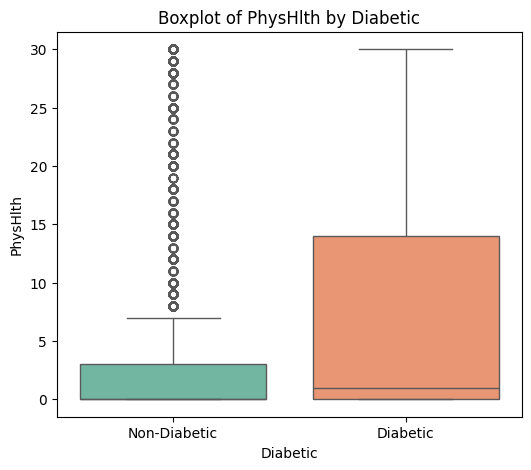

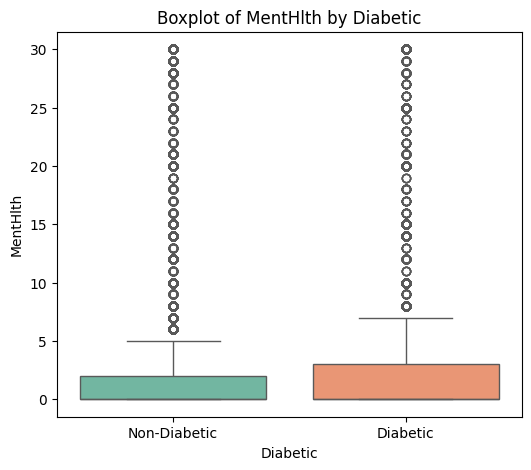

In [102]:
def scatter_by_target(df, x, y, target):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x=x, y=y, hue=target, alpha=0.6, palette=["#66b3ff", "#ff9999"])
    plt.title(f"Scatter: {x} vs {y} by {target}")
    plt.show()

def boxplot_by_target(df, feature, target):
    plt.figure(figsize=(6,5))
    sns.boxplot(data=df, x=target, y=feature, palette="Set2")
    plt.title(f"Boxplot of {feature} by {target}")
    plt.xticks([0,1], ["Non-Diabetic", "Diabetic"])
    plt.show()

# Usage
scatter_by_target(diabetes, "BMI", "PhysHlth", "Diabetic")
scatter_by_target(diabetes, "BMI", "MentHlth", "Diabetic")

boxplot_by_target(diabetes, "BMI", "Diabetic")
boxplot_by_target(diabetes, "PhysHlth", "Diabetic")
boxplot_by_target(diabetes, "MentHlth", "Diabetic")

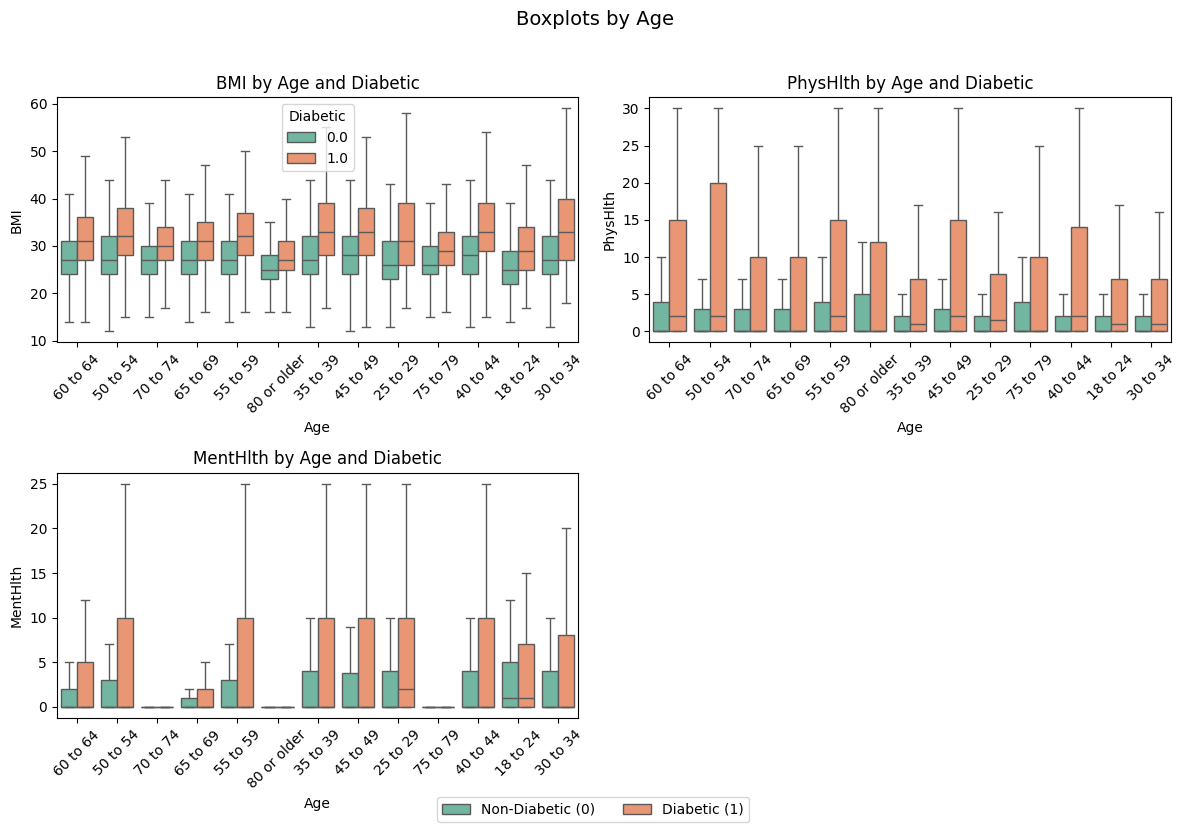

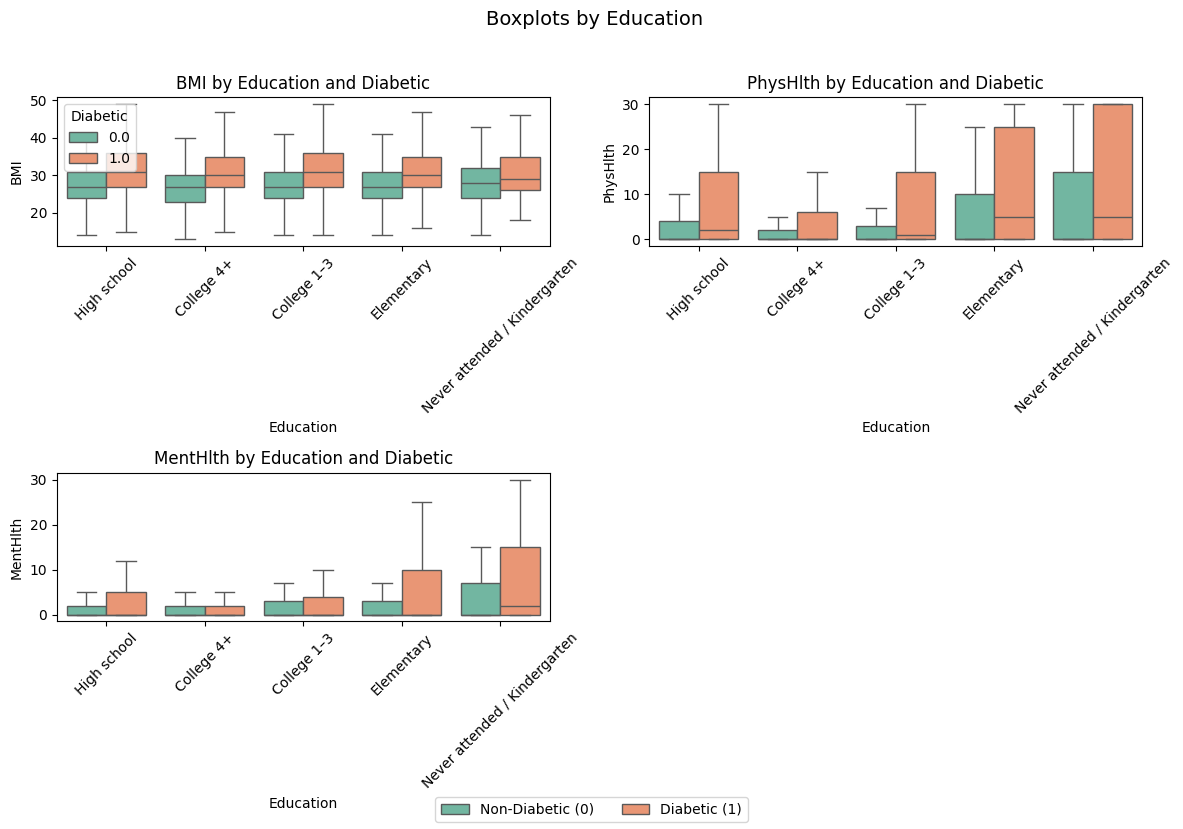

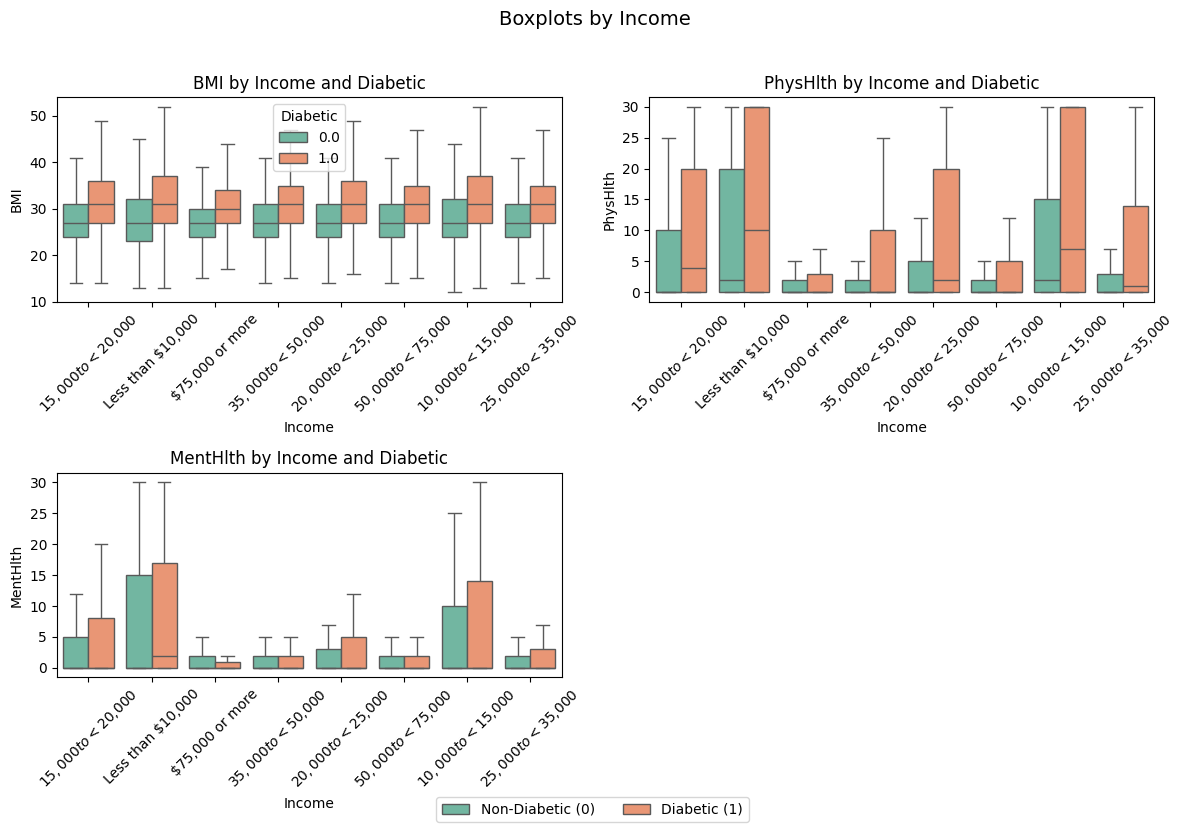

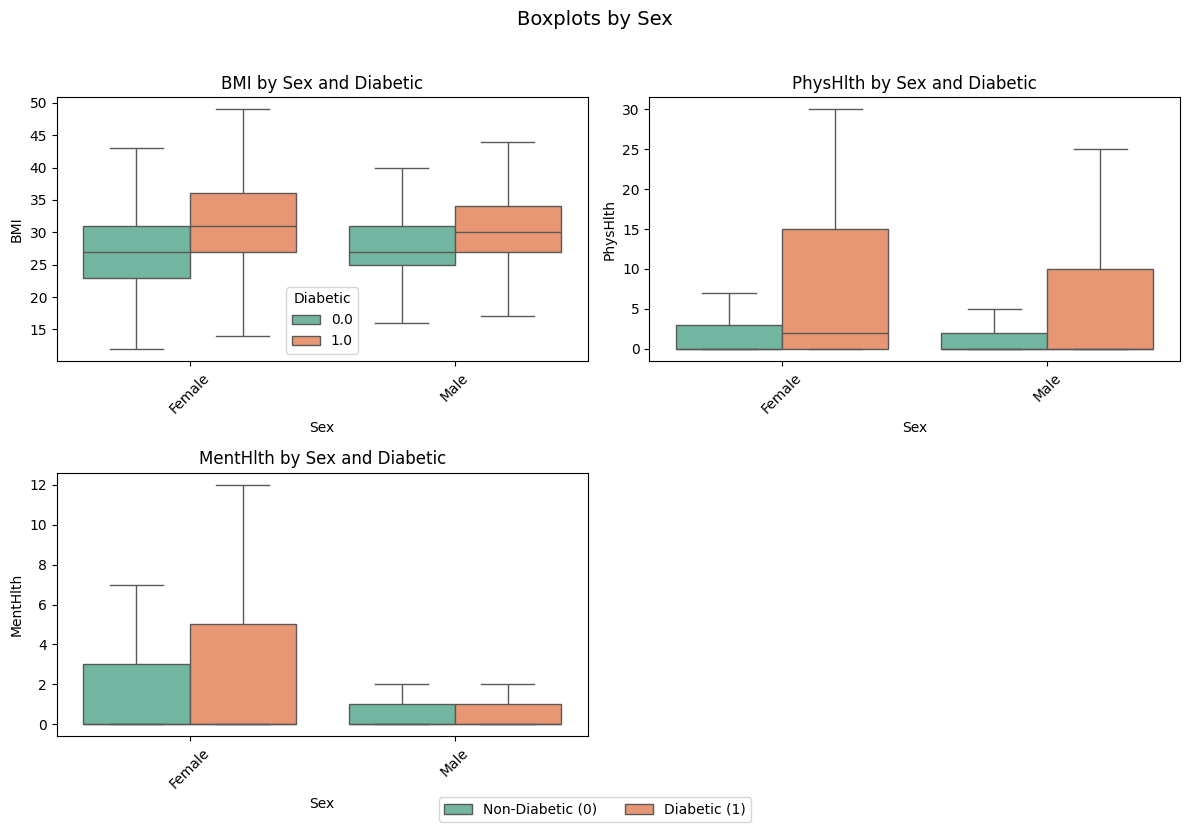

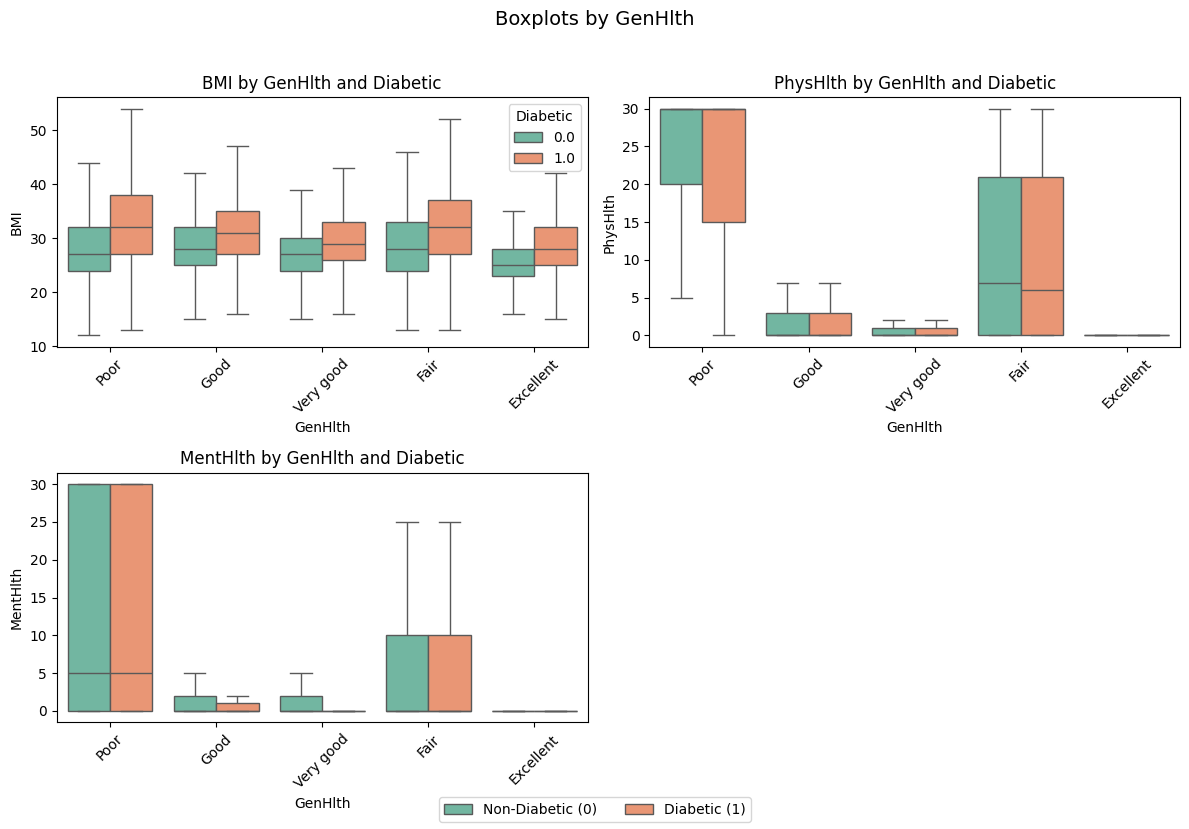

In [103]:

def boxplots_by_cat_and_numeric(df, cat_cols, num_cols, target="Diabetic", ncols=2, showfliers=False):
    """
    For each categorical column, draw boxplots of multiple numeric columns,
    split by a binary target (0/1).

    Parameters
    ----------
    df : pd.DataFrame
    cat_cols : list[str]  # e.g., ["Age_cat","Education_cat","Income_cat","Sex_cat"]
    num_cols : list[str]  # e.g., ["BMI","PhysHlth","MentHlth"]
    target : str          # default "Diabetic"
    ncols : int           # subplots per row
    showfliers : bool     # show outliers in boxplot
    """
    for cat in cat_cols:
        n = len(num_cols)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), squeeze=False)
        axes = axes.flatten()

        for ax, num in zip(axes, num_cols):
            sns.boxplot(
                data=df, x=cat, y=num, hue=target,
                palette="Set2", ax=ax, showfliers=showfliers
            )
            ax.set_title(f"{num} by {cat} and {target}")
            ax.set_xlabel(cat)
            ax.set_ylabel(num)
            ax.tick_params(axis="x", rotation=45)
            # legend only on the first subplot
            if ax is not axes[0]:
                ax.legend_.remove() if ax.get_legend() else None

        # tidy unused axes
        for ax in axes[n:]:
            ax.axis("off")

        # put one legend at the bottom
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, ["Non-Diabetic (0)", "Diabetic (1)"], loc="lower center", ncol=2)
        fig.suptitle(f"Boxplots by {cat}", y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()

# Example usage:
cat_cols = ["Age", "Education", "Income", "Sex", "GenHlth"]
num_cols = ["BMI", "PhysHlth", "MentHlth"]
boxplots_by_cat_and_numeric(diabetes, cat_cols, num_cols, target="Diabetic", ncols=2, showfliers=False)

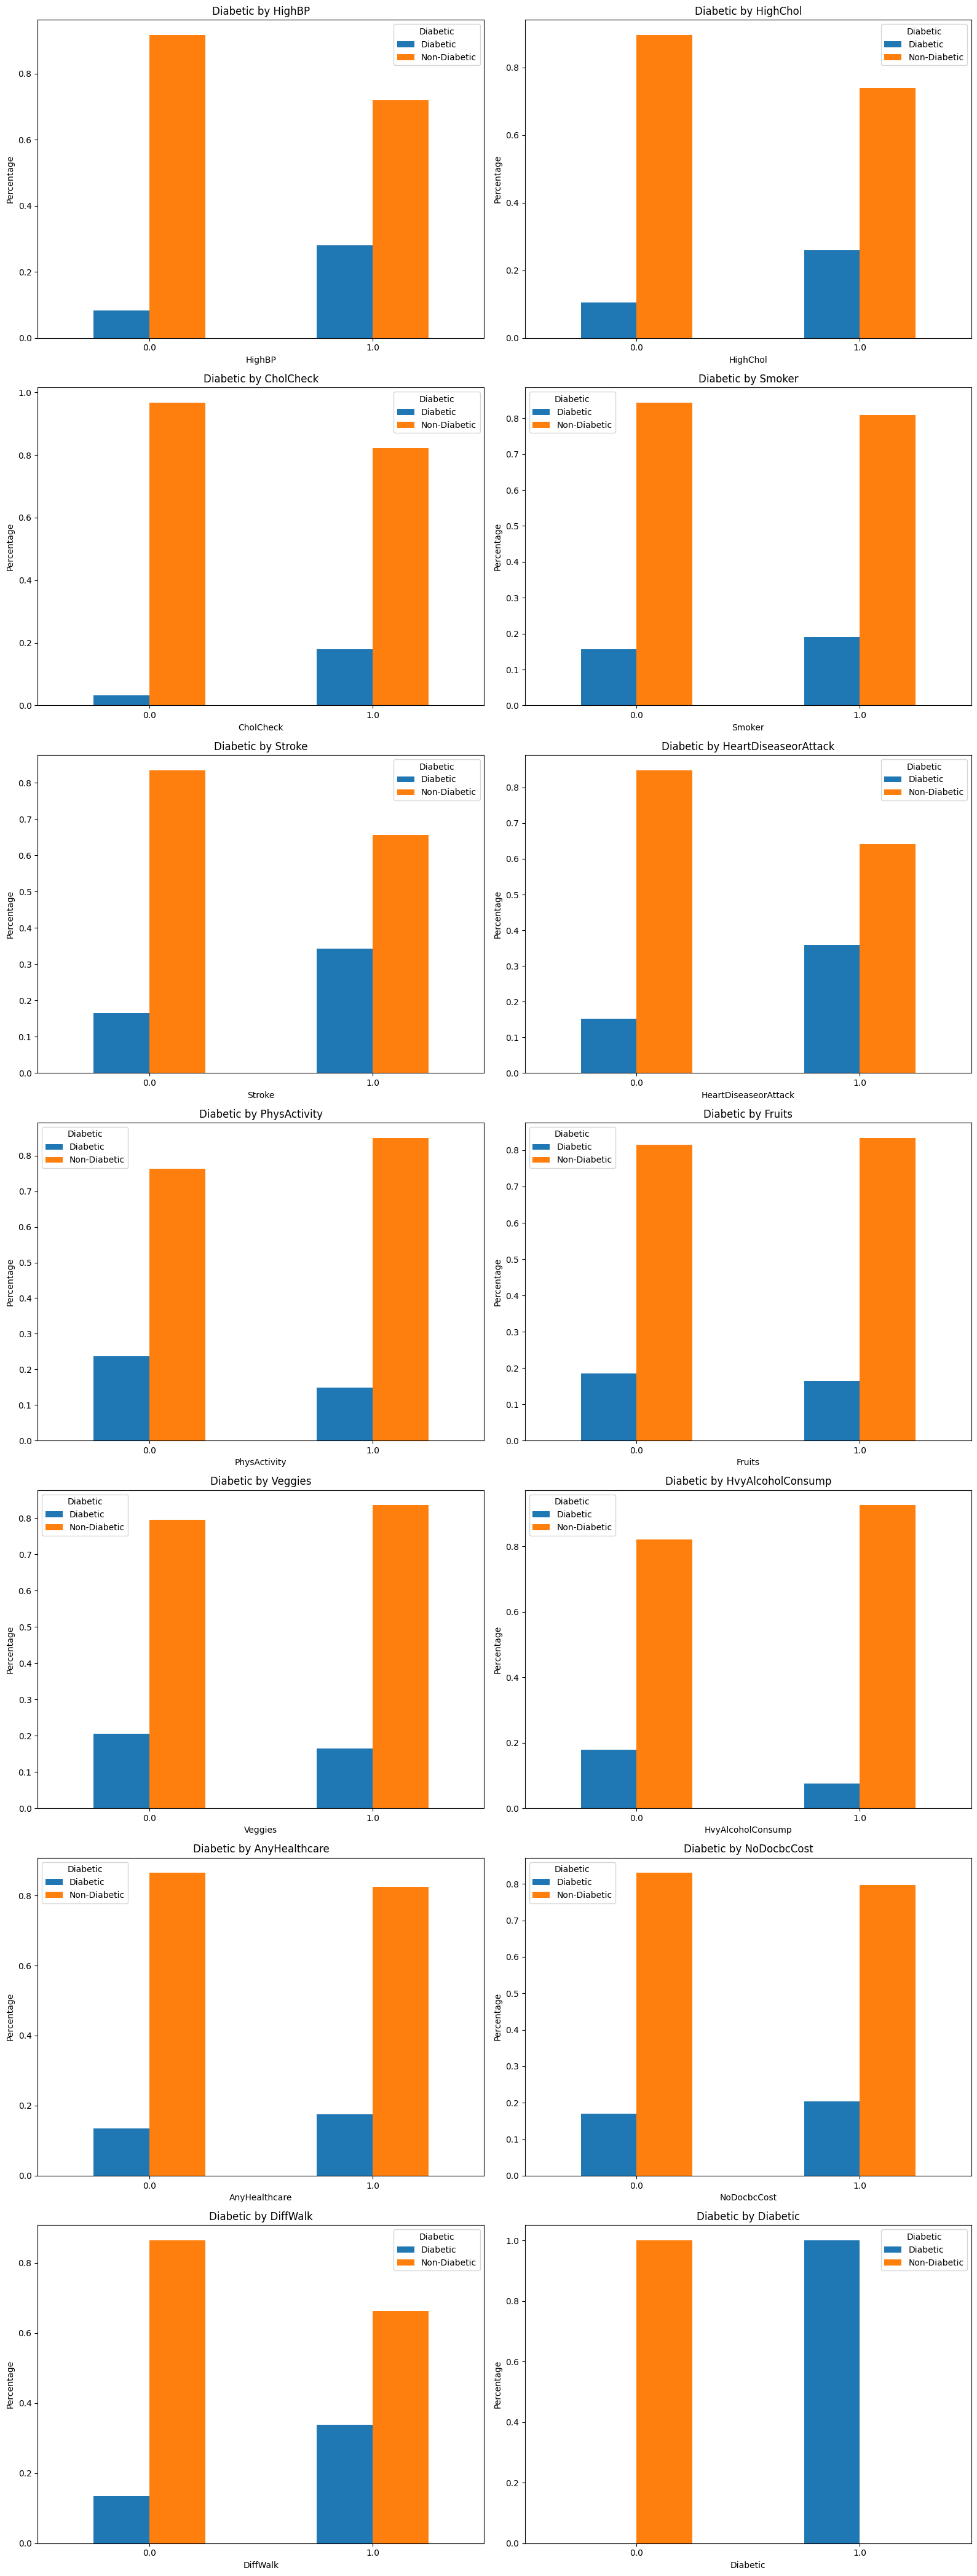

In [104]:

def plot_crosstab_bars(df, features, target="Diabetic", figsize=(8,6), normalize=False, ncols=2):
    """
    Create bar plots (crosstabs) for multiple categorical/binary features vs target.

    Parameters
    ----------
    df : pd.DataFrame
    features : list[str] - list of feature column names
    target : str         - target column name (default "Diabetic")
    figsize : tuple      - size per subplot (width, height)
    normalize : bool     - if True, plot percentages instead of raw counts
    ncols : int          - number of subplot columns
    """
    # Map 0/1 in target to readable labels
    df = df.copy()
    df[target + "_str"] = df[target].map({0: "Non-Diabetic", 1: "Diabetic"})

    n = len(features)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0]*ncols, figsize[1]*nrows))
    axes = axes.flatten()

    for ax, feature in zip(axes, features):
        # Crosstab
        ct = pd.crosstab(df[feature], df[target + "_str"], normalize='index' if normalize else False)

        # Bar plot
        ct.plot(kind="bar", ax=ax)
        ax.set_title(f"{target} by {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Percentage" if normalize else "Frequency")
        ax.legend(title=target)
        ax.tick_params(axis="x", rotation=0)

    # Hide unused subplots
    for ax in axes[len(features):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage

plot_crosstab_bars(diabetes, binary_cols, target="Diabetic", normalize=True, ncols=2)



In [105]:
cat_cols = diabetes.select_dtypes(include=['object', 'category']).columns
def conv_rate_by(col):
    out = (diabetes.groupby(col, observed=True)['Diabetic']
             .agg(Diabete_rate='mean',size='size')
             .sort_values('Diabete_rate', ascending=False))
    return out

if 'Diabetic' in cat_cols:
    cat_cols.remove('Diabetic')

for c in cat_cols:
    print(f"\n=== {c} ===")
    print(conv_rate_by(c).round({'Diabete_rate': 3}))


=== GenHlth ===
           Diabete_rate   size
GenHlth                       
Poor              0.408  12078
Fair              0.343  31546
Good              0.204  73714
Very good         0.097  77536
Excellent         0.041  34907

=== Sex ===
        Diabete_rate    size
Sex                         
Male           0.186  100927
Female         0.163  128854

=== Age ===
             Diabete_rate   size
Age                             
70 to 74            0.258  22041
75 to 79            0.249  15394
65 to 69            0.246  29168
80 or older         0.217  16813
60 to 64            0.215  29736
55 to 59            0.175  27301
50 to 54            0.151  23140
45 to 49            0.119  17299
40 to 44            0.086  14050
35 to 39            0.063  12234
30 to 34            0.039  10025
25 to 29            0.027   7068
18 to 24            0.018   5512

=== Education ===
                               Diabete_rate   size
Education                                         
Elementa

In [106]:
# Compute percentages
result = (
    diabetes.groupby(["HighBP", "HighChol"])["Diabetic"]
    .value_counts(normalize=True)  # gives proportion per group
    .mul(100)                      # convert to percentage
    .rename("Percentage")          # nice column name
    .reset_index()
)

# Map Diabetic 0/1 → text
result["Diabetic"] = result["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

print(result)


   HighBP  HighChol      Diabetic  Percentage
0     0.0       0.0  Non-Diabetic   94.069223
1     0.0       0.0      Diabetic    5.930777
2     0.0       1.0  Non-Diabetic   86.488071
3     0.0       1.0      Diabetic   13.511929
4     1.0       0.0  Non-Diabetic   80.429934
5     1.0       0.0      Diabetic   19.570066
6     1.0       1.0  Non-Diabetic   66.168347
7     1.0       1.0      Diabetic   33.831653


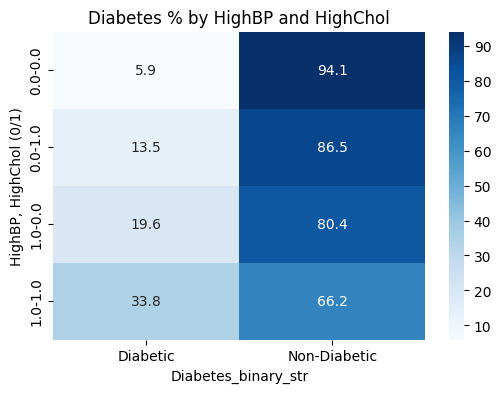

In [107]:
# Map 0/1 → labels in a new column
dfMap = diabetes.copy()
dfMap["Diabetes_binary_str"] = dfMap["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

ct = pd.crosstab([dfMap["HighBP"], dfMap["HighChol"]], dfMap["Diabetes_binary_str"], normalize="index") * 100

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Diabetes % by HighBP and HighChol")
plt.ylabel("HighBP, HighChol (0/1)")
plt.show()

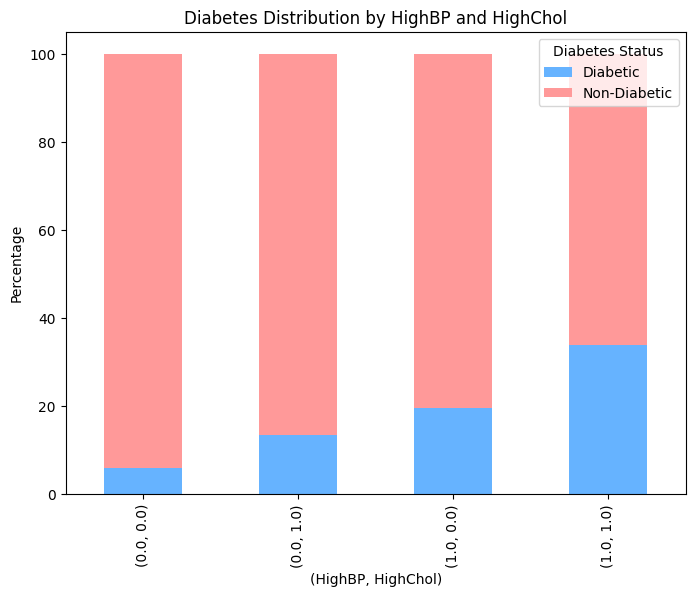

In [108]:
ct = pd.crosstab([dfMap["HighBP"], dfMap["HighChol"]], dfMap["Diabetes_binary_str"], normalize="index") * 100
ct.plot(kind="bar", stacked=True, figsize=(8,6), color=["#66b3ff", "#ff9999"])
plt.title("Diabetes Distribution by HighBP and HighChol")
plt.ylabel("Percentage")
plt.xlabel("(HighBP, HighChol)")
plt.legend(title="Diabetes Status")
plt.show()

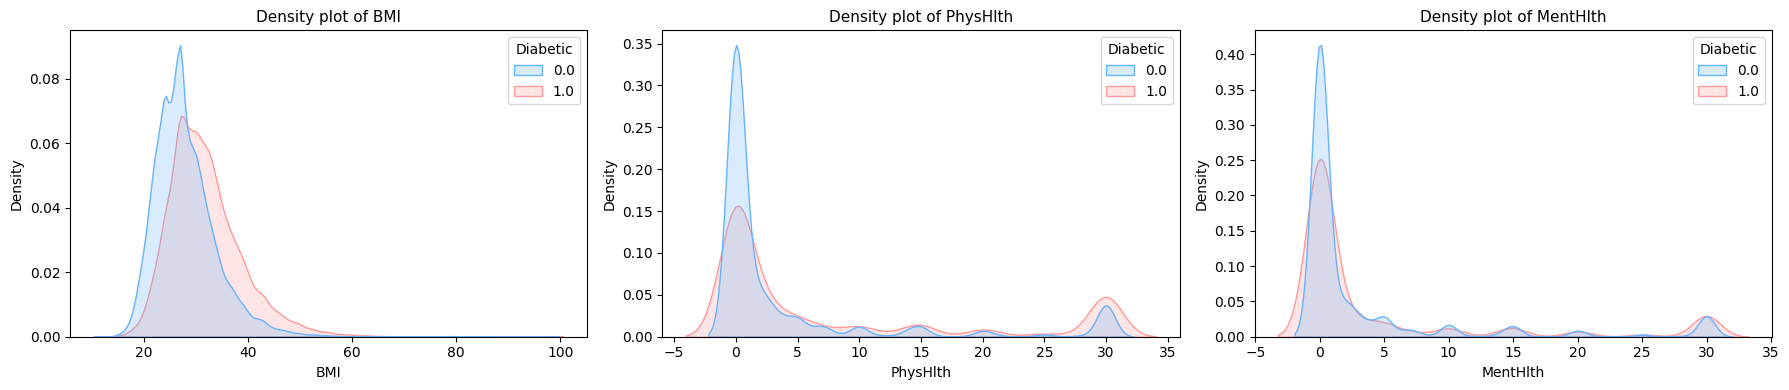

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_by_target(df, target, features=None):
    """
    Plot density distributions of numeric features split by target class.

    Args:
        df (DataFrame): dataset
        target (str): target column (binary: 0/1)
        features (list, optional): list of numeric features to plot.
                                   If None, use all numeric features.
    """
    if features is None:
        features = df.select_dtypes(include=["number"]).drop(columns=[target]).columns

    n_cols = 3
    n_rows = -(-len(features)//n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()

    for ax, col in zip(axes, features):
        sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                    palette=["#66b3ff", "#ff9999"], ax=ax)
        ax.set_title(f"Density plot of {col}", fontsize=11)

    # Hide unused axes
    for ax in axes[len(features):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
plot_density_by_target(diabetes, "Diabetic", features=["BMI","PhysHlth","MentHlth"])

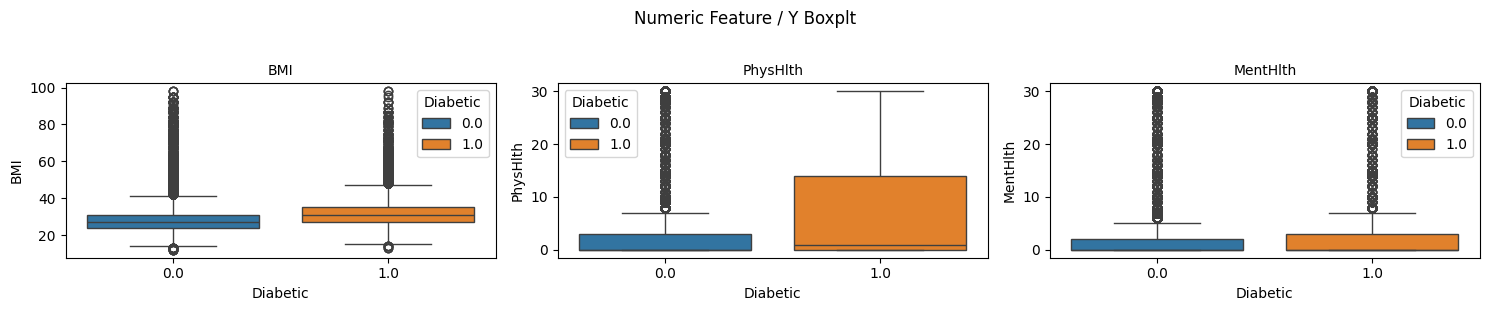

In [110]:
def plot_box_Y_all(df,palette="dark"):
    """
     Box plot for all numerical columns and Y in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
    """
    num_cols = ["BMI","PhysHlth","MentHlth"]
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        sns.boxplot(x="Diabetic", y=df[col], data=df,ax=ax,hue="Diabetic")
        ax.set_title(col, fontsize=10)

    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature / Y Boxplt", y=1.02)
    plt.tight_layout()
    plt.show()


plot_box_Y_all(diabetes)


Diabetes_binary_str   Diabetic  Non-Diabetic
BMI_group                                   
Normal                8.426988     91.573012
Overweight           16.001471     83.998529
Obese                28.283663     71.716337


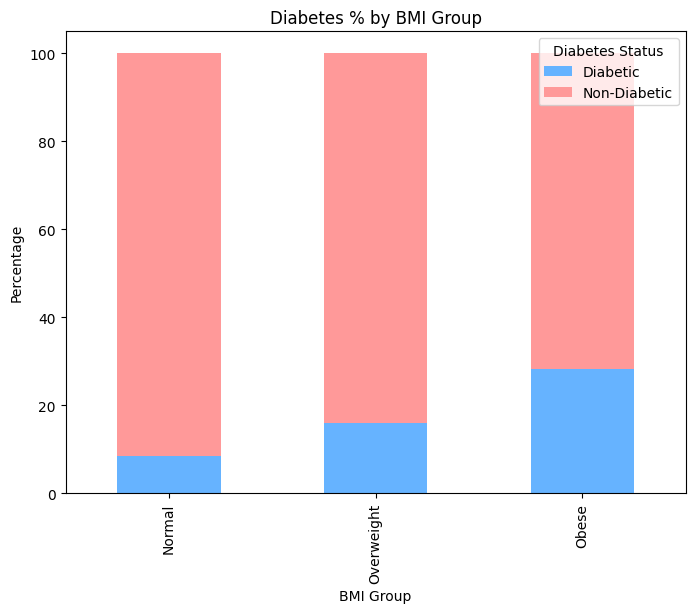

In [111]:
# Create BMI group column
diabetes["BMI_group"] = pd.cut(
    diabetes["BMI"],
    bins=[0, 25, 30, df1["BMI"].max()],
    labels=["Normal", "Overweight", "Obese"]
)

dfMap = diabetes.copy()
dfMap["Diabetes_binary_str"] = dfMap["Diabetic"].map({0: "Non-Diabetic", 1: "Diabetic"})

ct = pd.crosstab(dfMap["BMI_group"], dfMap["Diabetes_binary_str"], normalize="index") * 100
print(ct)

ct.plot(kind="bar", stacked=True, figsize=(8,6), color=["#66b3ff", "#ff9999"])
plt.title("Diabetes % by BMI Group")
plt.ylabel("Percentage")
plt.xlabel("BMI Group")
plt.legend(title="Diabetes Status")
plt.show()



Diabetes_binary_str   Diabetic  Non-Diabetic
GenHlth                                     
Poor                 40.801457     59.198543
Fair                 34.254739     65.745261
Good                 20.419459     79.580541
Very good             9.662608     90.337392
Excellent             4.148165     95.851835


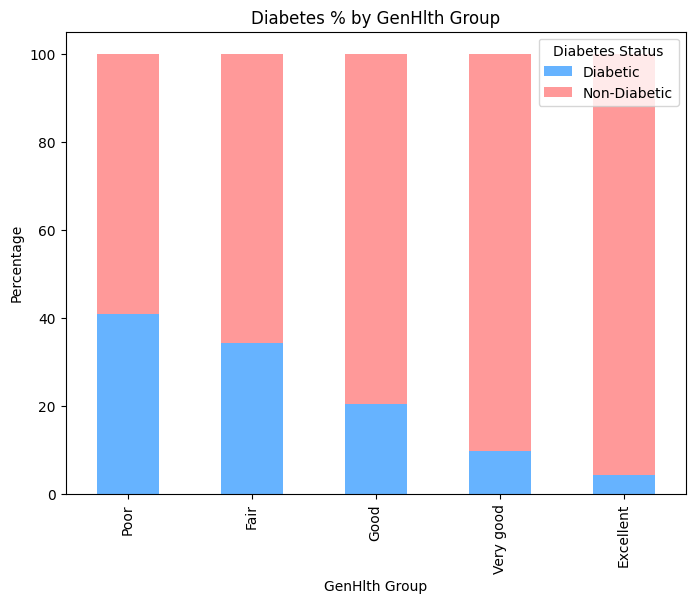

In [112]:
ct2 = pd.crosstab(
    dfMap["GenHlth"],
    dfMap["Diabetes_binary_str"],
    normalize="index"
) * 100

# Sort by Diabetic % (descending)
ct2 = ct2.sort_values("Diabetic", ascending=False)

print(ct2)

# Plot
ax = ct2.plot(
    kind="bar", stacked=True, figsize=(8,6),
    color=["#66b3ff", "#ff9999"]
)
plt.title("Diabetes % by GenHlth Group")
plt.ylabel("Percentage")
plt.xlabel("GenHlth Group")
plt.legend(title="Diabetes Status")

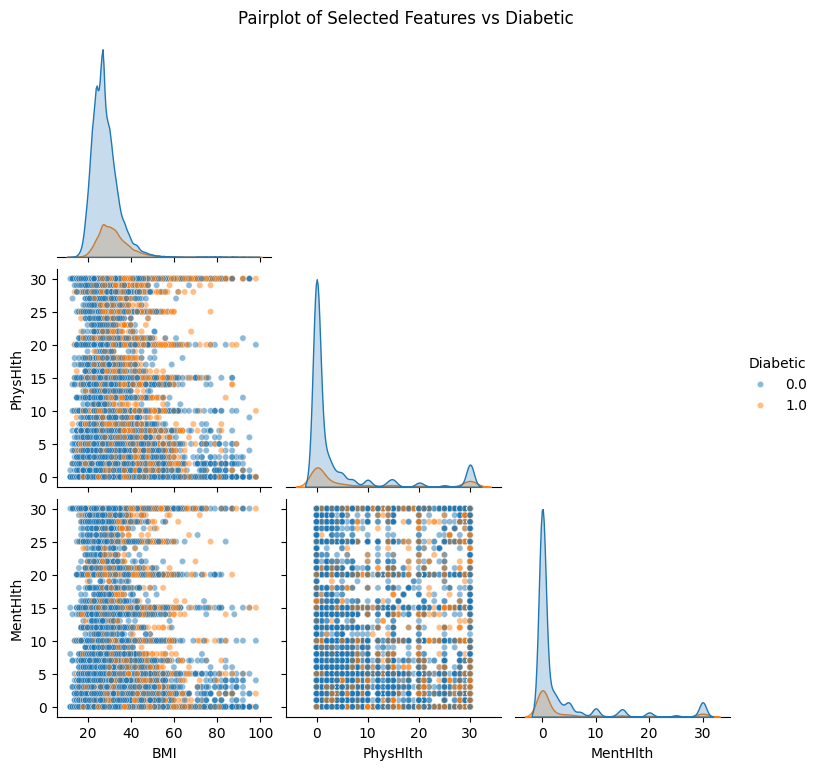

In [113]:
# pick a subset of numeric features (example)
features = ["BMI", "PhysHlth", "MentHlth", "Age", "Income"]

sns.pairplot(
    diabetes[features + ["Diabetic"]],
    hue="Diabetic",
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.5, "s": 20}
)

plt.suptitle("Pairplot of Selected Features vs Diabetic", y=1.02)
plt.show()

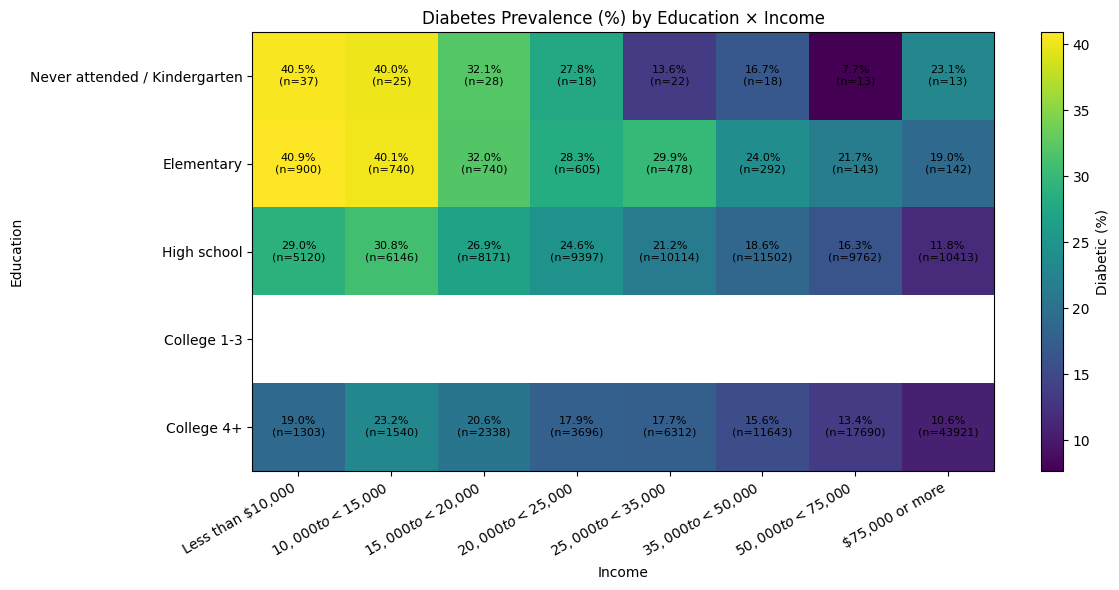

In [114]:
# 1) Order categories so the gradient reads naturally
edu_order = [
    "Never attended / Kindergarten",
    "Elementary",
    "High school",
    "College 1-3",
    "College 4+",
]
inc_order = [
    "Less than $10,000",
    "$10,000 to <$15,000",
    "$15,000 to <$20,000",
    "$20,000 to <$25,000",
    "$25,000 to <$35,000",
    "$35,000 to <$50,000",
    "$50,000 to <$75,000",
    "$75,000 or more",
]

df2 = diabetes.copy()
df2["Education"] = pd.Categorical(df2["Education"], categories=edu_order, ordered=True)
df2["Income"]    = pd.Categorical(df2["Income"], categories=inc_order, ordered=True)

# 2) Compute diabetic prevalence (%) and counts per cell
grp = df2.groupby(["Education", "Income"])
rate = (grp["Diabetic"].mean() * 100).unstack("Income").reindex(index=edu_order, columns=inc_order)
count = grp.size().unstack("Income").reindex(index=edu_order, columns=inc_order)

# 3) Plot heatmap with matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(rate.values, aspect="auto")  # default colormap

# Axes ticks/labels
ax.set_xticks(np.arange(len(inc_order)))
ax.set_yticks(np.arange(len(edu_order)))
ax.set_xticklabels(inc_order, rotation=30, ha="right")
ax.set_yticklabels(edu_order)
ax.set_xlabel("Income")
ax.set_ylabel("Education")
ax.set_title("Diabetes Prevalence (%) by Education × Income")

# Optional: annotate each cell with "rate%\n(n)"
for i in range(rate.shape[0]):
    for j in range(rate.shape[1]):
        val = rate.iat[i, j]
        n   = count.iat[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.1f}%\n(n={int(n)})",
                    ha="center", va="center", fontsize=8)

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Diabetic (%)")

plt.tight_layout()
plt.show()

In [115]:
# Cap BMI between 10 and 60
Q1 = diabetes["BMI"].quantile(0.25)
Q3 = diabetes["BMI"].quantile(0.85)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers for BMI
diabetes = diabetes[(diabetes["BMI"] >= lower_bound) & (diabetes["BMI"] <= upper_bound)]


## 📊 EDA Findings: Numeric Features

### BMI
- **Distribution:** Approximately normal, centered around **27–28 (overweight range)**.  
- **Spread:** Most values fall between **20–40**.  
- **Outliers:** Many extreme values above **40**, stretching to **100** (likely data-entry issues or rare extreme cases).  
#
## MentHlth (Days of poor mental health in last 30 days)
- **Distribution:** Highly right-skewed; most respondents reported **0 unhealthy days**.  
- **Median:** 0  
- **IQR:** 0–3 days  
- **Outliers:** Extend up to 30 days, representing individuals with chronic mental health issues.  

Desicion: to keep outliers seems meaningfull

---

### PhysHlth (Days of poor physical health in last 30 days)
- **Distribution:** Similar to MentHlth; majority report **0 unhealthy days**.  
- **Median:** 0  
- **IQR:** 0–5 days  
- **Outliers:** Values extend to 30 days, indicating chronic illness.  


Desicion: to keep outliers seems meaningfull


Key Findings: Numeric Features

BMI: Centered in the overweight range (27–28), with many respondents obese (BMI > 30). Extreme values exist but reflect rare obesity cases rather than noise.

MentHlth & PhysHlth: Both are highly skewed — most people report 0 unhealthy days, but a meaningful subgroup reports chronic poor health (10–30 days).

Decision: Outliers in all 2 variables should be kept, as they represent clinically

## 📊 EDA Findings: Binary Features

### Health Indicators
- **HighBP (High Blood Pressure):**
  - Yes = 45.4%, No = 54.6%
  - Almost half of respondents report hypertension.

- **HighChol (High Cholesterol):**
  - Yes = 44.2%, No = 55.8%
  - Similar distribution to HighBP, a large portion at risk.

- **CholCheck (Cholesterol Check in past 5 years):**
  - Yes = 96.0%, No = 4.0%
  - Strong preventive health behavior; most people get checked.

---

### Lifestyle Factors
- **Smoker:**
  - Yes = 46.6%, No = 53.4%
  - Nearly half of respondents are current or past smokers.

- **PhysActivity (Recent physical activity):**
  - Yes = 73.3%, No = 26.7%
  - Majority engage in physical activity.

- **Fruits:**
  - Yes = 61.3%, No = 38.7%
  - Most consume fruit regularly.

- **Veggies:**
  - Yes = 79.5%, No = 20.5%
  - Higher vegetable consumption than fruit.

- **HvyAlcoholConsump (Heavy alcohol use):**
  - Yes = 6.1%, No = 93.9%
  - Only a small group report heavy drinking.

---

### Medical History
- **Stroke:**
  - Yes = 4.5%, No = 95.5%
  - Low prevalence.

- **HeartDiseaseorAttack:**
  - Yes = 10.3%, No = 89.7%
  - About 1 in 10 report heart-related issues.

---

## Healthcare Access
- **AnyHealthcare:**
  - Yes = 94.6%, No = 5.4%
  - Most have healthcare coverage.

- **NoDocbcCost (Couldn’t see doctor due to cost):**
  - Yes = 9.3%, No = 90.7%
---

### Workout Limitations
- **DiffWalk (Difficulty walking):**
  - Yes = 18.6%, No = 81.4%
  - Almost 1 in 5 report mobility issues.

---

### Target Variable
- **Diabetic:**
  - Yes = 17.3%, No = 82.7%
  - Prevalence of diabetes in the dataset is 1 in 6.

---

# ✅ Key Insights
- Cardiovascular risk factors (HighBP, HighChol, Smoking) are present in **~45%** of the population.  
- Preventive care looks strong (**96% cholesterol check**, **95% healthcare coverage**).  
- Lifestyle patterns are mostly positive (**73% active, 80% eat vegetables**), though nearly half still smoke.  
- Diabetes prevalence is **17%**, aligning with the presence of other chronic conditions.  
- Important health disparities exist: **9% cite cost barriers** and **19% report mobility issues**, both of which may correlate strongly with diabetes risk.

## 📊 EDA Findings: Categorical Feature Distributions (Unfiltered for being Diabetics)

These plots show the **overall dataset composition** across key demographic and health perception variables.  
They do **not** filter by `Diabetic = 1` and should be interpreted as **population distribution**, not diabetes risk.

---

### General Health (GenHlth)
- **Poor:** ~40%  
- **Fair:** ~35%  
- **Good:** ~20%  
- **Very good:** ~9%  
- **Excellent:** ~3%  
➡️ Majority of respondents rate their health as **Poor or Fair**.

---

### Sex
- **Male:** ~18%  
- **Female:** ~16%  
➡️ The dataset is relatively balanced between males and females, with a slight male majority.

---

### Age
- Distribution skews **older**:
  - **70–74:** ~26%  
  - **75–79:** ~25%  
  - **65–69:** ~24%  
  - **60–64:** ~22%  
  - **Younger groups (18–34):** each under 10%  
➡️ Dataset is **heavily weighted toward older age groups**.

---

### Education
- **Elementary:** ~33%  
- **Never attended / Kindergarten:** ~28%  
- **High School:** ~21%  
- **Some College (1–3 years):** ~18%  
- **College 4+:** ~13%  
➡️ Lower education levels are **overrepresented** compared to higher education.

---

### Income
- **Lowest income (<$10,000–15,000):** ~28%  
- **$15,000–25,000:** ~27%  
- **$25,000–50,000:** ~22%  
- **$50,000–75,000:** ~18%  
- **Highest income ($75,000+):** ~12%  
➡️ Dataset is **skewed toward lower-income groups**.

---

## ✅ Key Takeaways (Unfiltered)
- The dataset is **not balanced**: it overrepresents individuals who are **older, lower-income, and with lower educational attainment**.  
- These characteristics may introduce **sampling bias** if used for population-level generalization.  
- For predictive modeling, these distributions highlight the need to carefully consider **class balance** and **demographic weighting**.


## 🎯 Target Variable: Diabetes Status
### Distribution
- **Non-Diabetic:** 82.7% (~190,000 records)  
- **Diabetic:** 17.3% (~40,000 records)  
### ✅ Key Insights
- The dataset is **imbalanced**, with a much larger share of non-diabetics (≈83%) compared to diabetics (≈17%).  
- This imbalance may bias predictive models toward the majority class unless addressed which I will use stratify the test and train.  





## 📊 Correlation Analysis

The table below shows pairwise correlations between key health and lifestyle features and the target (`Diabetic`).  
Although correlations are relatively modest (as expected in survey health data), some **important signals** emerge.

---

### Top Correlations with Diabetes
- **HighBP (0.26)** → Strongest single correlation; hypertension is highly associated with diabetes.  
- **BMI (0.21)** → higher BMI correlates with higher diabetes prevalence.  
- **DiffWalk (0.21)** → Difficulty walking is strongly linked to diabetes status.  
- **HighChol (0.20)** → High cholesterol also correlates meaningfully.  
- **PhysHlth (0.16)** → More poor physical health days associate with higher diabetes risk.  
- **HeartDiseaseorAttack (0.17)** → History of cardiovascular events is another clear risk factor.  

---

### Negative Correlations (Protective Factors)
- **PhysActivity (−0.10)** → Physical activity is moderately protective.  
- **Fruit (−0.02) & Veggies (−0.04)** → Very weak protective effect; dietary reporting may not capture full nutritional differences.  
- **HvyAlcoholConsump (−0.07)** → Slight negative correlation

---

### Health & Access
- **MentHlth (0.06)** → Small positive correlation, suggesting mild link with diabetes.  
- **AnyHealthcare (0.02)** → Weak positive correlation (almost negligible).  
- **NoDocbcCost (0.03)** → Weak correlation, but suggests financial barriers may affect management.

---

### ✅**Key Insights**
- **Metabolic risk factors** (HighBP, HighChol, BMI) and **mobility limitations (DiffWalk)** show the **strongest correlations** with diabetes.  
- **Lifestyle behaviors** (PhysActivity, diet) have weaker correlations but still align with expected direction (protective).  
- **Self-reported mental health** has only a weak relationship, but **poor physical health days** (PhysHlth) are meaningfully correlated.  
- Overall, no single feature dominates, suggesting that **multivariate modeling** (logistic regression, tree-based methods) will be more effective than relying on any one variable.


## 🔄 Interaction Effects

Beyond single-variable associations, scatterplots and correlations reveal that **combinations of features** provide stronger signals for diabetes risk.  

---

### 1. BMI × PhysHlth
- **Observation:** Diabetics cluster at **higher BMI values** (≥30) combined with **more poor physical health days** (≥10).  
- **Interpretation:** Obesity and chronic physical health issues together dramatically increase diabetes likelihood.  
- **Strength:** Strong — clear separation between diabetic and non-diabetic cases.  

---

### 2. BMI × MentHlth
- **Observation:** Higher BMI is associated with more diabetes cases, but **mental health days do not clearly separate diabetics**.  
- **Interpretation:** MentHlth has a weaker direct relationship, though diabetics with **both high BMI and many poor mental health days** may represent a subgroup with compounding risk.  
- **Strength:** Weak-to-moderate — BMI dominates the interaction.  

---

### 3. HighBP × Age
- **Observation (from correlations and category plots):**  
  - **Older adults with hypertension** show much higher diabetes prevalence.  
  - Younger individuals, even with high BP, have lower diabetes rates.  
- **Interpretation:** Hypertension amplifies age-related diabetes risk.  
- **Strength:** Strong — especially in age groups 55+.  

---

### 4. Education × Income (heat map above)
- **Observation:**   
  - Lower education combined with low income shows highest diabetes prevalence.  
  - Higher education appears protective, even in lower-income brackets.  
- **Interpretation:** Socioeconomic disadvantage compounds diabetes risk.  
- **Strength:** Moderate-to-strong socioeconomic gradient.  

---

### ✅ Key Takeaways
- Diabetes risk is **multifactorial** — no single feature fully explains it.  
- **Strongest interaction:** **High BMI + Poor Physical Health Days + Hypertension**.  
- **Weaker but notable effects:** BMI combined with MentHlth, or socioeconomic disadvantage (low income + low education).  
-based on the finding on intercations  **predictive modeling should include interaction terms** (e.g., polynomial/logistic regression with interaction features such as["BMI"] * ["PhysHlth"], or tree-based methods which capture them automatically RandomForestClassifier).

# 📊 Diabetes and Risk Factors: Binary Features & Sex Interactions

## 1. Boxplots by Sex and Diabetes Status

### BMI
- **Both sexes:** Diabetics have higher median BMI than non-diabetics.  
- **Females:** The gap between diabetics and non-diabetics is slightly larger, suggesting obesity may play a stronger role for women.  

### PhysHlth
- **Females:** Diabetic women report significantly more poor physical health days (often 10–30 days).  
- **Males:** Diabetic men also report more poor health, but the difference is smaller compared to women.  

### MentHlth
- **Females:** Diabetic women report more poor mental health days compared to non-diabetics.  
- **Males:** Little difference in mental health burden by diabetic status.  

➡️ **Key Takeaway:** The impact of diabetes on physical and mental health appears **more pronounced in women**.

---

## 2. Diabetes Prevalence by Binary Risk Factors

### Cardiovascular Risk
- **HighBP (Hypertension):** Diabetes prevalence much higher (~ 27%) vs normotensive (~7%).  
- **HighChol (Cholesterol):** Higher prevalence with high cholesterol (~25% vs ~8%).  
- **HeartDiseaseorAttack:** Strong association (~39% vs ~13%).  
- **Stroke:** Higher prevalence (~30% vs ~13%).  

### Lifestyle Behaviors
- **Smoker:** Slightly higher prevalence (~24% vs ~11%).  
- **PhysActivity:** Protective (inactive ~25% vs active ~16%).  
- **Fruits/Veggies:** Small protective effect (~16–18% vs ~20%).  
- **HvyAlcoholConsump:** Lower prevalence in heavy drinkers (~9% vs ~18%) — likely confounded.  

### Healthcare Access
- **AnyHealthcare:** Nearly universal coverage; little difference.  
- **NoDocbcCost:** Higher prevalence when cost prevents doctor visits (~22% vs ~16%).  

### Functional Limitation
- **DiffWalk:** Strong association; diabetics more likely to have walking difficulties (~33% vs ~14%).  

---

## ✅ Combined Insights
- **Sex-Specific Effects:** Diabetic women show stronger differences in **BMI, PhysHlth, and MentHlth**, pointing to a heavier health burden.  
- **Strongest Predictors Across Population:** HighBP, HighChol, HeartDisease, and DiffWalk show the largest diabetes prevalence gaps.  
- **Protective Behaviors:** Physical activity is the clearest protective factor; fruits/veggies weaker but consistent.  
- **Surprising Finding:** Heavy alcohol use shows lower prevalence — likely due to bias or confounding, not a true protective effect.  

---

📌 **Implication for Modeling:**  
- Consider **interaction terms** (e.g., `Sex × BMI`, `Sex × PhysHlth`) to capture gender differences.  
- Use binary risk factors directly as features; tree-based models will naturally capture interactions (e.g., `HighBP + Age`).  
- Apply caution with unexpected correlations (like alcohol) — they may not generalize

# 📊 Diabetes Prevalence by BMI Group

## Visualization
- Stacked bar chart shows the **percentage of diabetics vs non-diabetics** across BMI categories:
  - **Normal**
  - **Overweight**
  - **Obese**

---

## Observations
1. **Normal Weight:**  
   - Diabetes prevalence is lowest, around **9%**.  

2. **Overweight:**  
   - Prevalence rises to ~**16%**.  
   - Nearly double the rate of the normal-weight group.  

3. **Obese:**  
   - Prevalence reaches ~**29%**.  
   - More than **3× higher** than normal-weight individuals.  

---

## ✅ Key Insight
- Clear **dose-response relationship**: as BMI increases, diabetes prevalence rises sharply.  
- Obesity is one of the **strongest single predictors** of diabetes in the dataset.  
- This aligns with the correlation analysis (`BMI–Diabetic ≈ 0.21`) and interaction findings (e.g., BMI × PhysHlth).

---

📌 **Implication for Modeling:**  
- Treat BMI as both a **continuous variable** and a **categorical risk factor (Normal/Overweight/Obese)** to capture nonlinear effects.  
- Tree-based models will capture thresholds naturally, but logistic regression may benefit from **BMI group dummy variables** or **polynomial terms**.

# 🩺 Diabetes Prevalence by General Health (GenHlth)

## Visualization
- Stacked bar chart shows the **percentage of diabetics vs non-diabetics** across self-rated health groups:
  - Poor
  - Fair
  - Good
  - Very Good
  - Excellent

---

## Observations
1. **Poor Health:**  
   - Diabetes prevalence ~41% — the highest across all groups.  

2. **Fair Health:**  
   - Prevalence ~34% — still very high.  

3. **Good Health:**  
   - Prevalence ~21%.  

4. **Very Good Health:**  
   - Prevalence ~10%.  

5. **Excellent Health:**  
   - Prevalence ~4% — the lowest group.  

---

## ✅ Key Insight
- **Strong inverse relationship:** the better people rate their health, the lower their diabetes prevalence.  
- Self-rated health (GenHlth) is one of the **most predictive categorical features** — it integrates both **physical and lifestyle factors**.  
- Effect size is large: prevalence falls from ~41% (“Poor”) to ~4% (“Excellent”), a **10× difference**.

---

📌 **Implication for Modeling:**  
- Include GenHlth as an **ordinal feature** (Poor → Excellent).  
- Tree-based models will capture the trend naturally, but logistic regression may benefit from treating it as an **ordered categorical variable** rather than simple dummies.

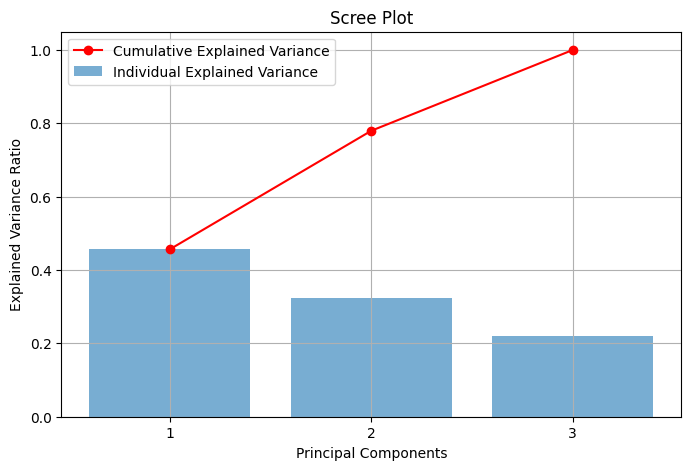

In [116]:
# Pick numeric health features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ["BMI", "PhysHlth", "MentHlth"]  # you can add more
X = diabetes[features]
y = diabetes["Diabetic"]

# Standardize before PCA
X_scaled = StandardScaler().fit_transform(X)

# Run PCA

# Scale before PCA
X_scaled = StandardScaler().fit_transform(X)


# Fit PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.6, label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker="o", color="red", label="Cumulative Explained Variance")

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.grid(True)
plt.show()


In [120]:
diabetes['Education']

,Education
0,High School
1,Higher
2,High School
3,High School
4,Higher
...,...
253675,Higher
253676,Basic
253677,Higher
253678,Higher


In [119]:

edu_map = {
    'College 4+': 'Higher',
    'College 1–3': 'Higher',
    'High school': 'High School',
    'Elementary': 'Basic',
    'Never attended / Kindergarten': 'Basic',
}


diabetes['Education'] = diabetes['Education'].map(edu_map)

In [139]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_group
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,Poor,18.0,15.0,1.0,Female,60 to 64,High School,"$15,000 to <$20,000",Obese
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,Good,0.0,0.0,0.0,Female,50 to 54,Higher,"Less than $10,000",Normal
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,Poor,30.0,30.0,1.0,Female,60 to 64,High School,"$75,000 or more",Overweight
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,Very good,0.0,0.0,0.0,Female,70 to 74,High School,"$35,000 to <$50,000",Overweight
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,Very good,3.0,0.0,0.0,Female,70 to 74,Higher,"$20,000 to <$25,000",Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,0.0,5.0,0.0,Male,40 to 44,Higher,"$50,000 to <$75,000",Obese
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Fair,0.0,0.0,1.0,Female,70 to 74,Basic,"$20,000 to <$25,000",Normal
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,Excellent,0.0,0.0,0.0,Female,25 to 29,Higher,"$10,000 to <$15,000",Overweight
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,0.0,0.0,0.0,Male,50 to 54,Higher,"Less than $10,000",Normal


3. Train/Test split


In [145]:
from sklearn.model_selection import train_test_split

 # Decide to drop some columns
 # -----------------------------
# Drop unwanted features
# -----------------------------
target = "Diabetic"
drop_cols = ['HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']

X = diabetes.drop(columns=[target, "Diabetes_binary_str"] + drop_cols, errors="ignore")
y = diabetes[target].astype(int)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Y")
print(y.value_counts(normalize=True))
print("Y Train")
print(y_train.value_counts(normalize=True))
print("Y Test")
print(y_test.value_counts(normalize=True))

Y
Diabetic
0    0.829269
1    0.170731
Name: proportion, dtype: float64
Y Train
Diabetic
0    0.829267
1    0.170733
Name: proportion, dtype: float64
Y Test
Diabetic
0    0.829274
1    0.170726
Name: proportion, dtype: float64


In [146]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_group
56484,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,Very good,0.0,10.0,0.0,Female,65 to 69,High School,"$35,000 to <$50,000",Overweight
62573,1.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,Good,0.0,0.0,0.0,Female,75 to 79,Higher,"$35,000 to <$50,000",Obese
8224,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,Very good,0.0,0.0,0.0,Male,60 to 64,Higher,"$75,000 or more",Overweight
44245,0.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,1.0,Good,0.0,0.0,0.0,Male,65 to 69,High School,"$50,000 to <$75,000",Overweight
122265,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,Good,0.0,1.0,0.0,Female,45 to 49,Higher,"$50,000 to <$75,000",Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214671,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,Very good,0.0,0.0,0.0,Male,70 to 74,High School,"$50,000 to <$75,000",Obese
41871,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,Good,0.0,0.0,0.0,Female,65 to 69,High School,"$35,000 to <$50,000",Obese
59513,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,Excellent,0.0,0.0,0.0,Female,70 to 74,Higher,"$50,000 to <$75,000",Normal
190174,1.0,1.0,1.0,38.0,0.0,0.0,0.0,1.0,1.0,1.0,Fair,0.0,25.0,0.0,Female,45 to 49,Higher,"$75,000 or more",Obese


4. Baseline model

In [147]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, precision_recall_curve


dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_train = dummy.predict(X_train)

y_pred_test = dummy.predict(X_test)
y_prob = getattr(dummy, "predict_proba", lambda X: None)(X_test)
y_score = y_prob[:,1] if y_prob is not None else y_pred_test  # fall back if needed

baseline = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test": accuracy_score(y_test, y_pred_test),
    "roc_auc": roc_auc_score(y_test, y_score) if y_prob is not None else 0.5,
    "f1_positive": f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc": average_precision_score(y_test, y_score)
}
print(f"Baseline:")
for key, value in baseline.items():
    print(f"{key}: {value}")

Baseline:
accuracy train: 0.8292672193281148
accuracy test: 0.829273659427465
roc_auc: 0.5
f1_positive: 0.0
pr_auc: 0.17072634057253505


Confusion Matrix:
 [[37688     0]
 [ 7759     0]]


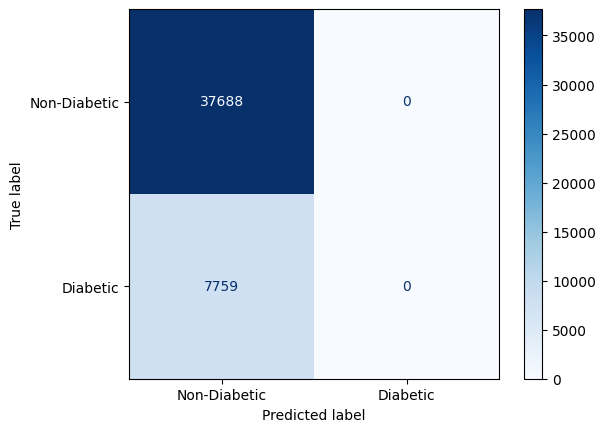

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = actual labels, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:\n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.show()

✅ Key Insight

The model is completely biased toward the majority class (Non-Diabetic).

This happens because the dataset is imbalanced (83% non-diabetic vs 17% diabetic).

A “naive” model predicting everyone = non-diabetic gets high accuracy, but fails on recall for diabetics (the class of interest).

### Preprocession



In [69]:
diabetes.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetic', 'Diabetes_binary_str', 'BMI_group'],
      dtype='object')

In [52]:
cat_cols = diabetes.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['GenHlth', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary_str',
       'BMI_group'],
      dtype='object')

In [53]:
cat_cols = diabetes.select_dtypes(include=['number']).columns
cat_cols

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Diabetic'],
      dtype='object')

In [55]:
diabetes.Income.value_counts()

,count
Income,
"$75,000 or more",71327
"$50,000 to <$75,000",39829
"$35,000 to <$50,000",34669
"$25,000 to <$35,000",25055
"$20,000 to <$25,000",19661
"$15,000 to <$20,000",15658
"$10,000 to <$15,000",11480
"Less than $10,000",9555


In [164]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import time


cat_cols = ["Sex","Age"]
num_cols =["BMI", "MentHlth", "PhysHlth"]

Ordianl_col= ["GenHlth","Education","BMI_group","Income"]

genhlth_order= [["Excellent", "Very good", "Good", "Fair", "Poor"]]
Education_order= [["Higher","High School","Basic"]]
BMI_group_order= [["Obese","Normal","Overweight"]]
income_order = [[
    "Less than $10,000",
    "$10,000 to <$15,000",
    "$15,000 to <$20,000",
    "$20,000 to <$25,000",
    "$25,000 to <$35,000",
    "$35,000 to <$50,000",
    "$50,000 to <$75,000",
    "$75,000 or more"
]]

BinaryKeep = ["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","DiffWalk"]
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", StandardScaler())
        ]), num_cols),

        ("ordGnHelth", Pipeline([
            ("encoder", OrdinalEncoder(categories=genhlth_order))
        ]), ["GenHlth"]),
        ("ordEducation", Pipeline([
            ("encoderEdu", OrdinalEncoder(categories=Education_order))
        ]), ["Education"]),
        ("ordBMIGroup", Pipeline([
            ("encoderBmi", OrdinalEncoder(categories=BMI_group_order))
        ]), ["BMI_group"]),
        ("ordIncome", Pipeline([
            ("encoderBmi", OrdinalEncoder(categories=income_order))
        ]), ["Income"]),
        ("onehot", Pipeline([
            ("onehot", OneHotEncoder(drop="first"))
        ]), cat_cols),

    ],
    remainder="drop"
)


In [165]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth']),
                                ('ordGnHelth',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Excellent',
                                                                              'Very '
                                                                              'good',
                                                                              'Good',
                                                                              'Fair',
                                                                              'Poor']]))]),
                                 ['GenHlth']),
                                ('ordEducation',
                                 Pipeline(steps=[('encoderEdu',
                                                  OrdinalEncoder(categories=[['Higher',
                                                                              'High '
                                                                              'School',
                                                                              'B...
                                ('ordIncome',
                                 Pipeline(steps=[('encoderBmi',
                                                  OrdinalEncoder(categories=[['Less '
                                                                              'than '
                                                                              '$10,000',
                                                                              '$10,000 '
                                                                              'to '
                                                                              '<$15,000',
                                                                              '$15,000 '
                                                                              'to '
                                                                              '<$20,000',
                                                                              '$20,000 '
                                                                              'to '
                                                                              '<$25,000',
                                                                              '$25,000 '
                                                                              'to '
                                                                              '<$35,000',
                                                                              '$35,000 '
                                                                              'to '
                                                                              '<$50,000',
                                                                              '$50,000 '
                                                                              'to '
                                                                              '<$75,000',
                                                                              '$75,000 '
                                                                              'or '
                                                                              'more']]))]),
                                 ['Income']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Sex', 'Age'])])

In [167]:
linear_clf = Pipeline([
    ("pre", preprocess),
    ("lr", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

# Fit
linear_clf.fit(X_train, y_train)

# Predict
y_pred_train = linear_clf.predict(X_train)
y_pred_test  = linear_clf.predict(X_test)

# Probabilities for ROC/PR
if hasattr(linear_clf, "predict_proba"):
    y_score = linear_clf.predict_proba(X_test)[:, 1]
else:
    # fallback (rare for LR)
    import numpy as np
    d = linear_clf.decision_function(X_test)
    y_score = 1 / (1 + np.exp(-d))

# Metrics
baseline_linear = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test":  accuracy_score(y_test,  y_pred_test),
    "roc_auc":        roc_auc_score(y_test, y_score),
    "f1_positive":    f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc":         average_precision_score(y_test, y_score)
}

print("Linear baseline (LogisticRegression):")
for k, v in baseline_linear.items():
    print(f"{k}: {v:.4f}")

Linear baseline (LogisticRegression):
accuracy train: 0.7000
accuracy test: 0.6994
roc_auc: 0.7856
f1_positive: 0.4540
pr_auc: 0.4178
